# I. Modélisation statistique

In [1]:
!pip install s3fs
!pip install pandas
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn
!pip install matplotlib

## I.1. Chargement et préparation des données

### A) Importation des données

In [2]:
import pandas as pd

# Importation des données avec code_insee en index
donnees = pd.read_csv("bdd_finale.csv", sep=',', encoding='utf-8', index_col=0)
donnees.head()

,beneficiaire_trans_eco,moyenne_conso_agri_hab,moyenne_conso_indus_hab,moyenne_conso_tertiaire_hab,moyenne_conso_residentiel_hab,moyenne_conso_totale_hab,emissions_ges,nb_actes_france_renov,friche,ecoquartiers,...,CSP_maire,com_variation_encours_dette_ha_pct,part_inactifs,part_actifs,dependance_eco,abstention_municipales,taux_creation_ent,total_entreprises,part_licencies_sportifs,part_jeunes_sans_diplome
code_insee,,,,,,,,,,,,,,,,,,,,,
22001,0,2.994071,0.000503,0.631181,3.688905,7.378017,14871,86,2,0,...,12,18.9,12.751678,47.147651,107,17.4,15.0,20,23.825503,9.1
22002,0,1.283886,0.032120,0.173206,3.248865,4.775226,8621,35,0,0,...,54,-39.3,11.062718,50.522648,96,53.8,12.1,33,30.836237,4.0
22003,0,0.000000,0.000000,0.524098,2.908468,3.472740,3028,47,0,0,...,56,99.8,14.239130,48.804348,113,53.7,36.7,30,35.760870,0.0
22004,0,0.200325,0.675332,1.267791,3.034877,5.203150,29130,46,6,0,...,33,-34.1,17.234927,40.540541,126,44.8,12.6,238,24.282744,12.4
22005,0,0.121358,0.082905,1.151104,3.532942,4.926877,4136,10,3,0,...,77,-14.5,14.188533,42.371234,140,22.9,18.8,64,27.891156,2.6


### B) Formatage des données

Nous allons pouvoir observer le type des données que nous avons. Cela va nous permettre de déterminer si on a besoin de modifier certaines variables pour qu'elles soient bien en variables catégorielles. 

In [3]:
donnees.dtypes

beneficiaire_trans_eco                  int64
moyenne_conso_agri_hab                float64
moyenne_conso_indus_hab               float64
moyenne_conso_tertiaire_hab           float64
moyenne_conso_residentiel_hab         float64
moyenne_conso_totale_hab              float64
emissions_ges                           int64
nb_actes_france_renov                   int64
friche                                  int64
ecoquartiers                            int64
part_residences_secondaires           float64
beneficiaire_prog                       int64
climat                                 object
gridens7                                int64
superf_choro                          float64
departement                             int64
gare_tgv                                int64
part_trajets_voiture                  float64
med_disp                                int64
p_pop                                   int64
CSP_maire                               int64
com_variation_encours_dette_ha_pct

In [4]:
# Conversion des variables en variables catégorielles
donnees["beneficiaire_trans_eco"] = donnees["beneficiaire_trans_eco"].astype('category')
donnees["ecoquartiers"] = donnees["ecoquartiers"].astype('category')
donnees["beneficiaire_prog"] = donnees["beneficiaire_prog"].astype('category')
donnees["gridens7"] = donnees["gridens7"].astype('category')
donnees["departement"] = donnees["departement"].astype('category')
donnees["gare_tgv"] = donnees["gare_tgv"].astype('category')
donnees["CSP_maire"] = donnees["CSP_maire"].astype('category')


# Cas de la variable climat 
donnees = pd.get_dummies(donnees, columns = ["climat"]) # On crée des variables binaires pour la variable climat car on a des chaînes de caractères

In [5]:
donnees.dtypes

beneficiaire_trans_eco                category
moyenne_conso_agri_hab                 float64
moyenne_conso_indus_hab                float64
moyenne_conso_tertiaire_hab            float64
moyenne_conso_residentiel_hab          float64
moyenne_conso_totale_hab               float64
emissions_ges                            int64
nb_actes_france_renov                    int64
friche                                   int64
ecoquartiers                          category
part_residences_secondaires            float64
beneficiaire_prog                     category
gridens7                              category
superf_choro                           float64
departement                           category
gare_tgv                              category
part_trajets_voiture                   float64
med_disp                                 int64
p_pop                                    int64
CSP_maire                             category
com_variation_encours_dette_ha_pct     float64
part_inactifs

Nous allons observer si on a des données manquantes dans notre jeu de données.

In [6]:
donnees.isna().sum()

beneficiaire_trans_eco                0
moyenne_conso_agri_hab                0
moyenne_conso_indus_hab               0
moyenne_conso_tertiaire_hab           0
moyenne_conso_residentiel_hab         0
moyenne_conso_totale_hab              0
emissions_ges                         0
nb_actes_france_renov                 0
friche                                0
ecoquartiers                          0
part_residences_secondaires           0
beneficiaire_prog                     0
gridens7                              0
superf_choro                          0
departement                           0
gare_tgv                              0
part_trajets_voiture                  0
med_disp                              0
p_pop                                 0
CSP_maire                             0
com_variation_encours_dette_ha_pct    0
part_inactifs                         0
part_actifs                           0
dependance_eco                        0
abstention_municipales                0


### C) Séparation de la variable à expliquer et des variables explicatives

In [7]:
# Définir X et y pour avoir les variables explicatives et la variable à expliquer beneficiaire_trans_eco
X = donnees.drop(columns=['beneficiaire_trans_eco'])

# Variable à expliquer : beneficiaire_trans_eco
y = donnees["beneficiaire_trans_eco"]

In [8]:
# import numpy as np

# # Convertir les listes en tableaux numpy
# X = np.array(X)
# y = np.array(y)

In [9]:
print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (1189, 31)
Dimensions de y: (1189,)


In [10]:
# import numpy as np

# np.unique(y)

## I.2. Modélisation

Nous allons d'abord diviser notre jeu de données en jeux d'apprentissage et de test.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [12]:
X_train.shape, y_train.shape

((951, 31), (951,))

In [13]:
X_test.shape, y_test.shape

((238, 31), (238,))

## I.2.1. Régression logistique

### A) Construction des modèles

Nous allons maintenant définir notre modèle de régression logistique, sans pénalité.

In [14]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

etapes_reg_log_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('smote', SMOTE()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('adasyn', ADASYN()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_bordeline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('bordeline_smote', BorderlineSMOTE()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

# Création des pipelines
modele_reg_log_smote  = Pipeline(steps=etapes_reg_log_smote) 
modele_reg_log_oversampler  = Pipeline(steps=etapes_reg_log_oversampler) 
modele_reg_log_adasyn  = Pipeline(steps=etapes_reg_log_adasyn)
modele_reg_log_bordeline_smote  = Pipeline(steps=etapes_reg_log_bordeline_smote)

On entraîne le modèle sur les données pour estimer les coefficients. 

In [15]:
modele_reg_log_smote.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('reg_log', LogisticRegression())])

In [16]:
modele_reg_log_oversampler.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler()),
                ('reg_log', LogisticRegression())])

In [17]:
modele_reg_log_adasyn.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('adasyn', ADASYN()),
                ('reg_log', LogisticRegression())])

In [18]:
modele_reg_log_bordeline_smote.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('bordeline_smote', BorderlineSMOTE()),
                ('reg_log', LogisticRegression())])

On cherche à prédire de nouvelles données grâce aux données test

In [19]:
y_proba_reg_log_smote = modele_reg_log_smote.predict_proba(X_test)[:,1]
y_pred_reg_log_smote = modele_reg_log_smote.predict(X_test)

In [20]:
y_proba_reg_log_oversampler = modele_reg_log_oversampler.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler = modele_reg_log_oversampler.predict(X_test)

In [21]:
y_proba_reg_log_adasyn = modele_reg_log_adasyn.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn = modele_reg_log_adasyn.predict(X_test)

In [22]:
y_proba_reg_log_bordeline_smote = modele_reg_log_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_reg_log_bordeline_smote = modele_reg_log_bordeline_smote.predict(X_test)

#### B) Mesure de la performance des modèles initiaux

Nous allons maintenant évaluer la performance de notre modèle

In [23]:
from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score


# Calcul des métriques
auc_roc_reg_log_smote = roc_auc_score(y_test, y_proba_reg_log_smote)
auc_pr_reg_log_smote  = average_precision_score(y_test, y_proba_reg_log_smote)
log_loss_value_reg_log_smote  = log_loss(y_test, y_proba_reg_log_smote)
precision_reg_log_smote  = precision_score(y_test, y_pred_reg_log_smote)
recall_reg_log_smote  = recall_score(y_test, y_pred_reg_log_smote)
f1_reg_log_smote = f1_score(y_test, y_pred_reg_log_smote)
mcc_reg_log_smote  = matthews_corrcoef(y_test, y_pred_reg_log_smote)
balanced_acc_reg_log_smote  = balanced_accuracy_score(y_test, y_pred_reg_log_smote)
specificity_reg_log_smote  = confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote)[0, 1])
cohen_kappa_reg_log_smote  = cohen_kappa_score(y_test, y_pred_reg_log_smote)

In [24]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_oversampler = roc_auc_score(y_test, y_proba_reg_log_oversampler)
auc_pr_reg_log_oversampler = average_precision_score(y_test, y_proba_reg_log_oversampler)
log_loss_value_reg_log_oversampler = log_loss(y_test, y_proba_reg_log_oversampler)
precision_reg_log_oversampler = precision_score(y_test, y_pred_reg_log_oversampler)
recall_reg_log_oversampler = recall_score(y_test, y_pred_reg_log_oversampler)
f1_reg_log_oversampler = f1_score(y_test, y_pred_reg_log_oversampler)
mcc_reg_log_oversampler = matthews_corrcoef(y_test, y_pred_reg_log_oversampler)
balanced_acc_reg_log_oversampler = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler)
specificity_reg_log_oversampler = confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 1])
cohen_kappa_reg_log_oversampler = cohen_kappa_score(y_test, y_pred_reg_log_oversampler)

In [25]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_adasyn = roc_auc_score(y_test, y_proba_reg_log_adasyn)
auc_pr_reg_log_adasyn = average_precision_score(y_test, y_proba_reg_log_adasyn)
log_loss_value_reg_log_adasyn = log_loss(y_test, y_proba_reg_log_adasyn)
precision_reg_log_adasyn = precision_score(y_test, y_pred_reg_log_adasyn)
recall_reg_log_adasyn = recall_score(y_test, y_pred_reg_log_adasyn)
f1_reg_log_adasyn = f1_score(y_test, y_pred_reg_log_adasyn)
mcc_reg_log_adasyn = matthews_corrcoef(y_test, y_pred_reg_log_adasyn)
balanced_acc_reg_log_adasyn = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn)
specificity_reg_log_adasyn = confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 1])
cohen_kappa_reg_log_adasyn = cohen_kappa_score(y_test, y_pred_reg_log_adasyn)

In [26]:
# Calcul des métriques

auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_bordeline_smote)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_bordeline_smote)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_bordeline_smote)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_bordeline_smote)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_bordeline_smote)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_bordeline_smote)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_bordeline_smote)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_bordeline_smote)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_bordeline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_bordeline_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_bordeline_smote)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_bordeline_smote)


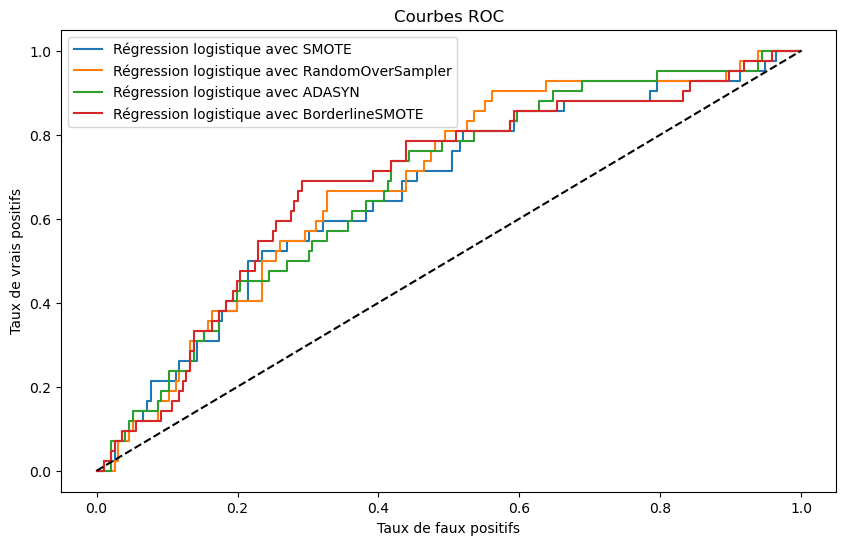

In [27]:
# Comparaison des courbes ROC

from sklearn.metrics import roc_curve

fpr_reg_log_smote, tpr_reg_log_smote, _ = roc_curve(y_test, y_proba_reg_log_smote)
fpr_reg_log_oversampler, tpr_reg_log_oversampler, _ = roc_curve(y_test, y_proba_reg_log_oversampler)
fpr_reg_log_adasyn, tpr_reg_log_adasyn, _ = roc_curve(y_test, y_proba_reg_log_adasyn)
fpr_reg_log_bordeline_smote, tpr_reg_log_bordeline_smote, _ = roc_curve(y_test, y_proba_reg_log_bordeline_smote)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote, tpr_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler, tpr_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn, tpr_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_bordeline_smote, tpr_reg_log_bordeline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

plt.show()

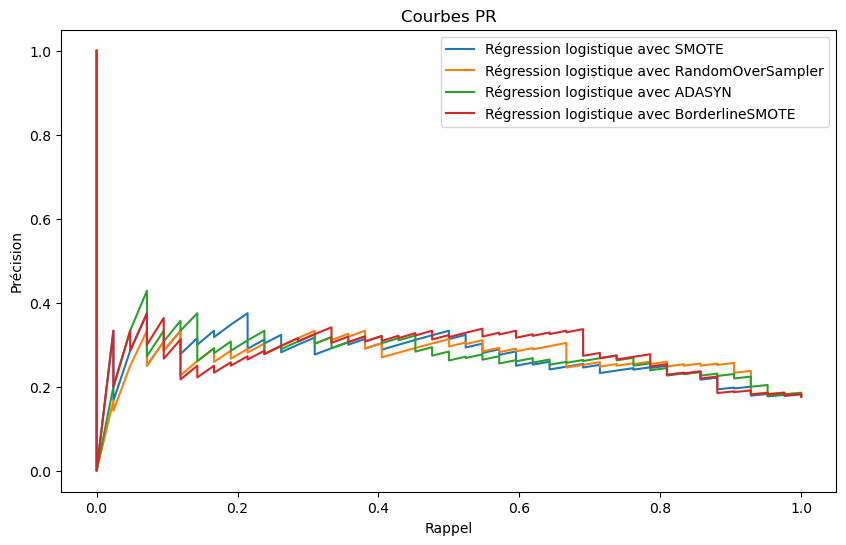

In [28]:
# Comparaison des courbes PR

from sklearn.metrics import precision_recall_curve

precision_reg_log_smote, recall_reg_log_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_smote)
precision_reg_log_oversampler, recall_reg_log_oversampler, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler)
precision_reg_log_adasyn, recall_reg_log_adasyn, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn)
precision_reg_log_bordeline_smote, recall_reg_log_bordeline_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_bordeline_smote)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote, precision_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler, precision_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn, precision_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_bordeline_smote, precision_reg_log_bordeline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')
plt.legend()
plt.show()

In [29]:
# Résultats 

resultats_reg_log = pd.DataFrame({
    "AUC-ROC": [auc_roc_reg_log_smote, auc_roc_reg_log_oversampler, auc_roc_reg_log_adasyn, auc_roc_reg_log_borderline_smote],
    "AUC-PR": [auc_pr_reg_log_smote, auc_pr_reg_log_oversampler, auc_pr_reg_log_adasyn, auc_pr_reg_log_borderline_smote],
    "Log Loss": [log_loss_value_reg_log_smote, log_loss_value_reg_log_oversampler, log_loss_value_reg_log_adasyn, log_loss_value_reg_log_borderline_smote],
   # "Précision": [precision_reg_log_smote, precision_reg_log_oversampler, precision_reg_log_adasyn, precision_reg_log_borderline_smote],
    #"Rappel": [recall_reg_log_smote, recall_reg_log_oversampler, recall_reg_log_adasyn, recall_reg_log_borderline_smote],
    "F1 Score": [f1_reg_log_smote, f1_reg_log_oversampler, f1_reg_log_adasyn, f1_reg_log_borderline_smote],
    "MCC": [mcc_reg_log_smote, mcc_reg_log_oversampler, mcc_reg_log_adasyn, mcc_reg_log_borderline_smote],
    "Accuracy": [balanced_acc_reg_log_smote, balanced_acc_reg_log_oversampler, balanced_acc_reg_log_adasyn, balanced_acc_reg_log_borderline_smote],
    "Spécificité": [specificity_reg_log_smote, specificity_reg_log_oversampler, specificity_reg_log_adasyn, specificity_reg_log_borderline_smote],
    "Kappa de Cohen": [cohen_kappa_reg_log_smote, cohen_kappa_reg_log_oversampler, cohen_kappa_reg_log_adasyn, cohen_kappa_reg_log_borderline_smote]
}, index=["Reg log - SMOTE", "Reg log - RandomOverSampler", "Reg log - ADASYN", "Reg log - BorderlineSMOTE"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log = resultats_reg_log.round(3)
resultats_reg_log

,AUC-ROC,AUC-PR,Log Loss,F1 Score,MCC,Accuracy,Spécificité,Kappa de Cohen
Reg log - SMOTE,0.665,0.282,0.652,0.379,0.207,0.632,0.668,0.182
Reg log - RandomOverSampler,0.687,0.278,0.643,0.397,0.234,0.649,0.679,0.207
Reg log - ADASYN,0.677,0.282,0.644,0.353,0.167,0.607,0.643,0.144
Reg log - BorderlineSMOTE,0.686,0.291,0.650,0.436,0.294,0.687,0.684,0.257


#### C) Ajustement des hyperparamètres

Pour la régression logistique, les hyperparamètres les plus courants à optimiser sont :
- C : Ce paramètre de régularisation inverse. Une valeur plus petite indique une régularisation plus forte.
- solver : L'algorithme utilisé pour l'optimisation. Les choix courants sont 'liblinear', 'lbfgs', 'saga', etc.
- penalty : Le type de régularisation à utiliser ('l1', 'l2', 'elasticnet', 'none')
- fonction de lien 

In [30]:
# Ajustement de chaque modèle

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Définir les paramètres de la grille
grille_param = {
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'None'], # Type de régularisation
}

# Choix des métriques pour l'optimisation
scoring = {
    'F1': make_scorer(f1_score), 
    'Recall': make_scorer(recall_score),
    'AUC': 'roc_auc'
}


# Création de la grille de recherche
grille_recherche_reg_log_smote = GridSearchCV(modele_reg_log_smote, grille_param, cv=5, scoring=scoring, refit='AUC')
grille_recherche_reg_log_oversampler = GridSearchCV(modele_reg_log_oversampler, grille_param, cv=5, scoring=scoring, refit='AUC')
grille_recherche_reg_log_adasyn = GridSearchCV(modele_reg_log_adasyn, grille_param, cv=5, scoring=scoring, refit='AUC')
grille_recherche_reg_log_bordeline_smote = GridSearchCV(modele_reg_log_bordeline_smote, grille_param, cv=5, scoring=scoring, refit='AUC')

# Ajustement de la grille de recherche
grille_recherche_reg_log_smote.fit(X_train, y_train)
grille_recherche_reg_log_oversampler.fit(X_train, y_train)
grille_recherche_reg_log_adasyn.fit(X_train, y_train)
grille_recherche_reg_log_bordeline_smote.fit(X_train, y_train)

# Récupération des résultats de la grille de recherche
resultats_grille_reg_log_smote = grille_recherche_reg_log_smote.cv_results_
resultats_grille_reg_log_oversampler = grille_recherche_reg_log_oversampler.cv_results_
resultats_grille_reg_log_adasyn = grille_recherche_reg_log_adasyn.cv_results_
resultats_grille_reg_log_bordeline_smote = grille_recherche_reg_log_bordeline_smote.cv_results_

# Récupération des meilleurs paramètres
meilleurs_parametres_reg_log_smote = grille_recherche_reg_log_smote.best_params_
meilleurs_parametres_reg_log_oversampler = grille_recherche_reg_log_oversampler.best_params_
meilleurs_parametres_reg_log_adasyn = grille_recherche_reg_log_adasyn.best_params_
meilleurs_parametres_reg_log_bordeline_smote = grille_recherche_reg_log_bordeline_smote.best_params_

# Récupération des meilleurs scores
meilleur_score_reg_log_smote = grille_recherche_reg_log_smote.best_score_
meilleur_score_reg_log_oversampler = grille_recherche_reg_log_oversampler.best_score_
meilleur_score_reg_log_adasyn = grille_recherche_reg_log_adasyn.best_score_
meilleur_score_reg_log_bordeline_smote = grille_recherche_reg_log_bordeline_smote.best_score_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



In [31]:
# Ajustement des modèles
modele_reg_log_smote_cv = grille_recherche_reg_log_smote.best_estimator_
modele_reg_log_oversampler_cv = grille_recherche_reg_log_oversampler.best_estimator_
modele_reg_log_adasyn_cv = grille_recherche_reg_log_adasyn.best_estimator_
modele_reg_log_bordeline_smote_cv = grille_recherche_reg_log_bordeline_smote.best_estimator_

# Prédiction sur l'échantillon test
y_proba_reg_log_smote_cv = modele_reg_log_smote_cv.predict_proba(X_test)[:, 1]
y_pred_reg_log_smote_cv = modele_reg_log_smote_cv.predict(X_test)

y_proba_reg_log_oversampler_cv = modele_reg_log_oversampler_cv.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler_cv = modele_reg_log_oversampler_cv.predict(X_test)

y_proba_reg_log_adasyn_cv = modele_reg_log_adasyn_cv.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn_cv = modele_reg_log_adasyn_cv.predict(X_test)

y_proba_reg_log_bordeline_smote_cv = modele_reg_log_bordeline_smote_cv.predict_proba(X_test)[:, 1]
y_pred_reg_log_bordeline_smote_cv = modele_reg_log_bordeline_smote_cv.predict(X_test)


#### D) Mesure de la performance des modèles optimisés

In [32]:
# Calcul des métriques pour chaque modèle

# Calcul des métriques
auc_roc_reg_log_smote_cv = roc_auc_score(y_test, y_proba_reg_log_smote_cv)
auc_pr_reg_log_smote_cv = average_precision_score(y_test, y_proba_reg_log_smote_cv)
log_loss_value_reg_log_smote_cv = log_loss(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_smote_cv = precision_score(y_test, y_pred_reg_log_smote_cv)
recall_reg_log_smote_cv = recall_score(y_test, y_pred_reg_log_smote_cv)
f1_reg_log_smote_cv = f1_score(y_test, y_pred_reg_log_smote_cv)
mcc_reg_log_smote_cv = matthews_corrcoef(y_test, y_pred_reg_log_smote_cv)
balanced_acc_reg_log_smote_cv = balanced_accuracy_score(y_test, y_pred_reg_log_smote_cv)
specificity_reg_log_smote_cv = confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 1])
cohen_kappa_reg_log_smote_cv = cohen_kappa_score(y_test, y_pred_reg_log_smote_cv)

In [33]:
auc_roc_reg_log_oversampler_cv = roc_auc_score(y_test, y_proba_reg_log_oversampler_cv)
auc_pr_reg_log_oversampler_cv = average_precision_score(y_test, y_proba_reg_log_oversampler_cv)
log_loss_value_reg_log_oversampler_cv = log_loss(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_oversampler_cv = precision_score(y_test, y_pred_reg_log_oversampler_cv)
recall_reg_log_oversampler_cv = recall_score(y_test, y_pred_reg_log_oversampler_cv)
f1_reg_log_oversampler_cv = f1_score(y_test, y_pred_reg_log_oversampler_cv)
mcc_reg_log_oversampler_cv = matthews_corrcoef(y_test, y_pred_reg_log_oversampler_cv)
balanced_acc_reg_log_oversampler_cv = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler_cv)
specificity_reg_log_oversampler_cv = confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 1])
cohen_kappa_reg_log_oversampler_cv = cohen_kappa_score(y_test, y_pred_reg_log_oversampler_cv)

In [34]:
auc_roc_reg_log_adasyn_cv = roc_auc_score(y_test, y_proba_reg_log_adasyn_cv)
auc_pr_reg_log_adasyn_cv = average_precision_score(y_test, y_proba_reg_log_adasyn_cv)   
log_loss_value_reg_log_adasyn_cv = log_loss(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_adasyn_cv = precision_score(y_test, y_pred_reg_log_adasyn_cv)
recall_reg_log_adasyn_cv = recall_score(y_test, y_pred_reg_log_adasyn_cv)
f1_reg_log_adasyn_cv = f1_score(y_test, y_pred_reg_log_adasyn_cv)
mcc_reg_log_adasyn_cv = matthews_corrcoef(y_test, y_pred_reg_log_adasyn_cv)
balanced_acc_reg_log_adasyn_cv = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn_cv)
specificity_reg_log_adasyn_cv = confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 1])
cohen_kappa_reg_log_adasyn_cv = cohen_kappa_score(y_test, y_pred_reg_log_adasyn_cv)

In [35]:
auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_bordeline_smote_cv)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_bordeline_smote_cv)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_bordeline_smote_cv)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_bordeline_smote_cv)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_bordeline_smote_cv)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_bordeline_smote_cv)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_bordeline_smote_cv)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_bordeline_smote_cv)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_bordeline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_bordeline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_bordeline_smote_cv)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_bordeline_smote_cv)

In [36]:
# Affichage des résultats

resultats_reg_log_cv = pd.DataFrame({
    "AUC-ROC": [auc_roc_reg_log_smote_cv, auc_roc_reg_log_oversampler_cv, auc_roc_reg_log_adasyn_cv, auc_roc_reg_log_borderline_smote],
    "AUC-PR": [auc_pr_reg_log_smote_cv, auc_pr_reg_log_oversampler_cv, auc_pr_reg_log_adasyn_cv, auc_pr_reg_log_borderline_smote],
    "Log Loss": [log_loss_value_reg_log_smote_cv, log_loss_value_reg_log_oversampler_cv, log_loss_value_reg_log_adasyn_cv, log_loss_value_reg_log_borderline_smote],
    "Précision": [precision_reg_log_smote_cv, precision_reg_log_oversampler_cv, precision_reg_log_adasyn_cv, precision_reg_log_borderline_smote],
    "Rappel": [recall_reg_log_smote_cv, recall_reg_log_oversampler_cv, recall_reg_log_adasyn_cv, recall_reg_log_borderline_smote],
    "F1 Score": [f1_reg_log_smote_cv, f1_reg_log_oversampler_cv, f1_reg_log_adasyn_cv, f1_reg_log_borderline_smote],
    "MCC": [mcc_reg_log_smote_cv, mcc_reg_log_oversampler_cv, mcc_reg_log_adasyn_cv, mcc_reg_log_borderline_smote],
    "Accuracy": [balanced_acc_reg_log_smote_cv, balanced_acc_reg_log_oversampler_cv, balanced_acc_reg_log_adasyn_cv, balanced_acc_reg_log_borderline_smote],
    "Spécificité": [specificity_reg_log_smote_cv, specificity_reg_log_oversampler_cv, specificity_reg_log_adasyn_cv, specificity_reg_log_borderline_smote],
    "Kappa de Cohen": [cohen_kappa_reg_log_smote_cv, cohen_kappa_reg_log_oversampler_cv, cohen_kappa_reg_log_adasyn_cv, cohen_kappa_reg_log_borderline_smote]
}, index=["Reg log - SMOTE", "Reg log - RandomOverSampler", "Reg log - ADASYN", "Reg log - BorderlineSMOTE"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log_cv = resultats_reg_log_cv.round(3)
resultats_reg_log_cv

,AUC-ROC,AUC-PR,Log Loss,Précision,Rappel,F1 Score,MCC,Accuracy,Spécificité,Kappa de Cohen
Reg log - SMOTE,0.677,0.288,0.653,0.283,0.619,0.388,0.221,0.641,0.663,0.192
Reg log - RandomOverSampler,0.691,0.281,0.656,0.322,0.690,0.439,0.298,0.690,0.689,0.262
Reg log - ADASYN,0.669,0.278,0.657,0.283,0.619,0.388,0.221,0.641,0.663,0.192
Reg log - BorderlineSMOTE,0.669,0.271,0.652,0.296,0.690,0.414,0.262,0.669,0.648,0.222


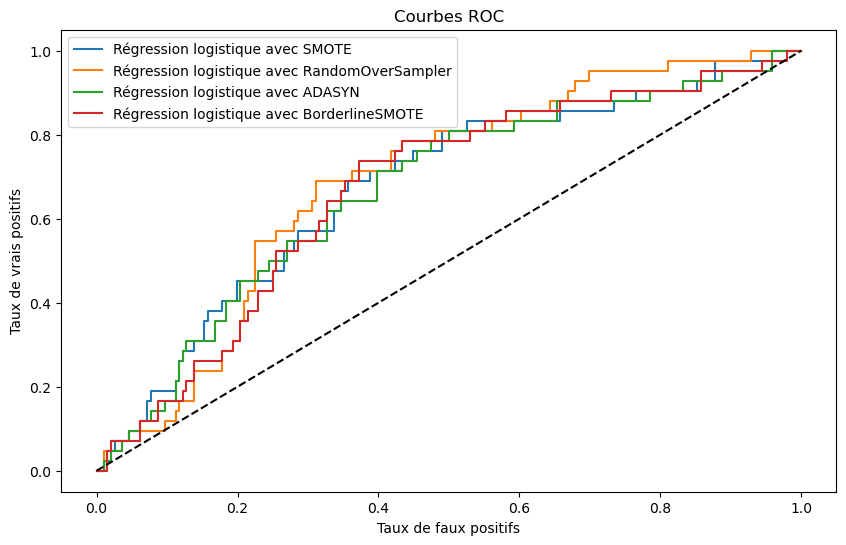

In [37]:
# Comparaison des courbes ROC

fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_smote_cv)
fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, _ = roc_curve(y_test, y_proba_reg_log_oversampler_cv)
fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, _ = roc_curve(y_test, y_proba_reg_log_adasyn_cv)
fpr_reg_log_bordeline_smote_cv, tpr_reg_log_bordeline_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_bordeline_smote_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_bordeline_smote_cv, tpr_reg_log_bordeline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

plt.show()

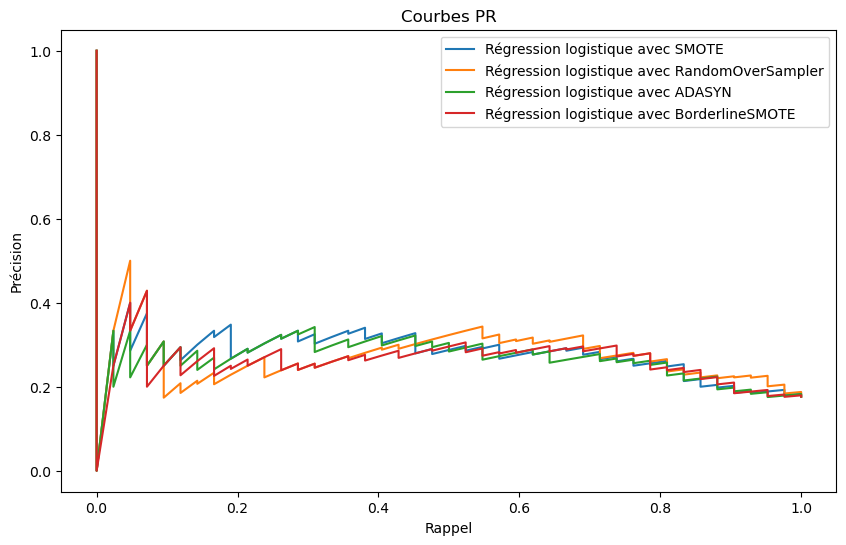

In [38]:
# Comparaison des courbes PR

precision_reg_log_smote_cv, recall_reg_log_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_oversampler_cv, recall_reg_log_oversampler_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_adasyn_cv, recall_reg_log_adasyn_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_bordeline_smote_cv, recall_reg_log_bordeline_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_bordeline_smote_cv)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote_cv, precision_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler_cv, precision_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn_cv, precision_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_bordeline_smote_cv, precision_reg_log_bordeline_smote_cv, label='Régression logistique avec BorderlineSMOTE')

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')

plt.legend()
plt.show()

#### E) Importance des variables

In [ ]:
# Importance des variables

# Récupération des coefficients de la régression logistique
coefficients_reg_log_smote = modele_reg_log_smote_cv.named_steps['reg_log'].coef_[0]
coefficients_reg_log_oversampler = modele_reg_log_oversampler_cv.named_steps['reg_log'].coef_[0]
coefficients_reg_log_adasyn = modele_reg_log_adasyn_cv.named_steps['reg_log'].coef_[0]
coefficients_reg_log_bordeline_smote = modele_reg_log_bordeline_smote_cv.named_steps['reg_log'].coef_[0]

# Récupération des noms des variables
noms_variables = X.columns

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_reg_log_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_smote
})

resultats_importance_variables_reg_log_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_oversampler
})

resultats_importance_variables_reg_log_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_adasyn
})

resultats_importance_variables_reg_log_bordeline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_bordeline_smote
})

# Affichage des résultats
resultats_importance_variables_reg_log_smote = resultats_importance_variables_reg_log_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_oversampler = resultats_importance_variables_reg_log_oversampler.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_adasyn = resultats_importance_variables_reg_log_adasyn.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_bordeline_smote = resultats_importance_variables_reg_log_bordeline_smote.sort_values(by="Coefficient", ascending=False)

In [ ]:
resultats_importance_variables_reg_log_smote

In [ ]:
resultats_importance_variables_reg_log_oversampler

In [ ]:
resultats_importance_variables_reg_log_adasyn

In [ ]:
resultats_importance_variables_reg_log_bordeline_smote

In [ ]:
# Graphique pour l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_smote["Variable"], resultats_importance_variables_reg_log_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec SMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_oversampler["Variable"], resultats_importance_variables_reg_log_oversampler["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec RandomOverSampler")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_adasyn["Variable"], resultats_importance_variables_reg_log_adasyn["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec ADASYN")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_bordeline_smote["Variable"], resultats_importance_variables_reg_log_bordeline_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec BorderlineSMOTE")
plt.show()


## I.2.3. Abres de décision

#### A) Construction des modèles

In [39]:
# Construction du modèle d'arbres de décision avec rééquilibrage des classes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

etapes_arbre_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier()), # Arbre de décision
        ]

etapes_arbre_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier()), # Arbre de décision
        ]

etapes_arbre_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN()), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier()), # Arbre de décision
        ]

etapes_arbre_bordeline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('bordeline_smote', BorderlineSMOTE()), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier()), # Arbre de décision
        ]



modele_arbre_oversampler = Pipeline(steps=etapes_arbre_oversampler) # Création du pipeline
modele_arbre_smote = Pipeline(steps=etapes_arbre_smote) # Création du pipeline
modele_arbre_adasyn = Pipeline(steps=etapes_arbre_adasyn) # Création du pipeline
modele_arbre_bordeline_smote = Pipeline(steps=etapes_arbre_bordeline_smote) # Création du pipeline)

In [40]:
modele_arbre_oversampler.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler()),
                ('arbre', DecisionTreeClassifier())])

In [41]:
modele_arbre_smote.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('arbre', DecisionTreeClassifier())])

In [42]:
modele_arbre_adasyn.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()), ('adasyn', ADASYN()),
                ('arbre', DecisionTreeClassifier())])

In [43]:
modele_arbre_bordeline_smote.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('bordeline_smote', BorderlineSMOTE()),
                ('arbre', DecisionTreeClassifier())])

In [44]:
# Prédictions

y_proba_arbre_oversampler = modele_arbre_oversampler.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler = modele_arbre_oversampler.predict(X_test)

y_proba_arbre_smote = modele_arbre_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_smote = modele_arbre_smote.predict(X_test)

y_proba_arbre_adasyn = modele_arbre_adasyn.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn = modele_arbre_adasyn.predict(X_test)

y_proba_arbre_bordeline_smote = modele_arbre_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_bordeline_smote = modele_arbre_bordeline_smote.predict(X_test)

#### B) Mesure de la performance des modèles initiaux

In [45]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_arbre_oversampler = roc_auc_score(y_test, y_proba_arbre_oversampler)
auc_pr_arbre_oversampler = average_precision_score(y_test, y_proba_arbre_oversampler)
log_loss_value_arbre_oversampler = log_loss(y_test, y_proba_arbre_oversampler)
precision_arbre_oversampler = precision_score(y_test, y_pred_arbre_oversampler)
recall_arbre_oversampler = recall_score(y_test, y_pred_arbre_oversampler)
f1_arbre_oversampler = f1_score(y_test, y_pred_arbre_oversampler)
mcc_arbre_oversampler = matthews_corrcoef(y_test, y_pred_arbre_oversampler)
balanced_acc_arbre_oversampler = balanced_accuracy_score(y_test, y_pred_arbre_oversampler)
specificity_arbre_oversampler = confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 1])
cohen_kappa_arbre_oversampler = cohen_kappa_score(y_test, y_pred_arbre_oversampler)

In [46]:
auc_roc_arbre_smote = roc_auc_score(y_test, y_proba_arbre_smote)
auc_pr_arbre_smote = average_precision_score(y_test, y_proba_arbre_smote)
log_loss_value_arbre_smote = log_loss(y_test, y_proba_arbre_smote)
precision_arbre_smote = precision_score(y_test, y_pred_arbre_smote)
recall_arbre_smote = recall_score(y_test, y_pred_arbre_smote)
f1_arbre_smote = f1_score(y_test, y_pred_arbre_smote)
mcc_arbre_smote = matthews_corrcoef(y_test, y_pred_arbre_smote)
balanced_acc_arbre_smote = balanced_accuracy_score(y_test, y_pred_arbre_smote)
specificity_arbre_smote = confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote)[0, 1])
cohen_kappa_arbre_smote = cohen_kappa_score(y_test, y_pred_arbre_smote)

In [47]:
auc_roc_arbre_adasyn = roc_auc_score(y_test, y_proba_arbre_adasyn)
auc_pr_arbre_adasyn = average_precision_score(y_test, y_proba_arbre_adasyn)
log_loss_value_arbre_adasyn = log_loss(y_test, y_proba_arbre_adasyn)
precision_arbre_adasyn = precision_score(y_test, y_pred_arbre_adasyn)
recall_arbre_adasyn = recall_score(y_test, y_pred_arbre_adasyn)
f1_arbre_adasyn = f1_score(y_test, y_pred_arbre_adasyn)
mcc_arbre_adasyn = matthews_corrcoef(y_test, y_pred_arbre_adasyn)
balanced_acc_arbre_adasyn = balanced_accuracy_score(y_test, y_pred_arbre_adasyn)
specificity_arbre_adasyn = confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 1])
cohen_kappa_arbre_adasyn = cohen_kappa_score(y_test, y_pred_arbre_adasyn)

In [48]:
auc_roc_arbre_bordeline_smote = roc_auc_score(y_test, y_proba_arbre_bordeline_smote)
auc_pr_arbre_bordeline_smote = average_precision_score(y_test, y_proba_arbre_bordeline_smote)
log_loss_value_arbre_bordeline_smote = log_loss(y_test, y_proba_arbre_bordeline_smote)
precision_arbre_bordeline_smote = precision_score(y_test, y_pred_arbre_bordeline_smote)
recall_arbre_bordeline_smote = recall_score(y_test, y_pred_arbre_bordeline_smote)
f1_arbre_bordeline_smote = f1_score(y_test, y_pred_arbre_bordeline_smote)
mcc_arbre_bordeline_smote = matthews_corrcoef(y_test, y_pred_arbre_bordeline_smote)
balanced_acc_arbre_bordeline_smote = balanced_accuracy_score(y_test, y_pred_arbre_bordeline_smote)
specificity_arbre_bordeline_smote = confusion_matrix(y_test, y_pred_arbre_bordeline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_bordeline_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_bordeline_smote)[0, 1])
cohen_kappa_arbre_bordeline_smote = cohen_kappa_score(y_test, y_pred_arbre_bordeline_smote)

In [49]:
# Affichage des résultats
resultats_arbres = pd.DataFrame({
    "AUC-ROC": [auc_roc_arbre_oversampler, auc_roc_arbre_smote, auc_roc_arbre_adasyn, auc_roc_arbre_bordeline_smote],
    "AUC-PR": [auc_pr_arbre_oversampler, auc_pr_arbre_smote, auc_pr_arbre_adasyn, auc_pr_arbre_bordeline_smote],
    "Log Loss": [log_loss_value_arbre_oversampler, log_loss_value_arbre_smote, log_loss_value_arbre_adasyn, log_loss_value_arbre_bordeline_smote],
    #"Précision": [precision_arbre_oversampler, precision_arbre_smote, precision_arbre_adasyn, precision_arbre_bordeline_smote],
    #"Rappel": [recall_arbre_oversampler, recall_arbre_smote, recall_arbre_adasyn, recall_arbre_bordeline_smote],
    "F1 Score": [f1_arbre_oversampler, f1_arbre_smote, f1_arbre_adasyn, f1_arbre_bordeline_smote],
    "MCC": [mcc_arbre_oversampler, mcc_arbre_smote, mcc_arbre_adasyn, mcc_arbre_bordeline_smote],
    "Accuracy": [balanced_acc_arbre_oversampler, balanced_acc_arbre_smote, balanced_acc_arbre_adasyn, balanced_acc_arbre_bordeline_smote],
    "Spécificité": [specificity_arbre_oversampler, specificity_arbre_smote, specificity_arbre_adasyn, specificity_arbre_bordeline_smote],
    "Kappa de Cohen": [cohen_kappa_arbre_oversampler, cohen_kappa_arbre_smote, cohen_kappa_arbre_adasyn, cohen_kappa_arbre_bordeline_smote]
}, index=["Arbre - RandomOverSampler", "Arbre - SMOTE", "Arbre - ADASYN", "Arbre - BorderlineSMOTE"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres = resultats_arbres.round(3)
resultats_arbres

,AUC-ROC,AUC-PR,Log Loss,F1 Score,MCC,Accuracy,Spécificité,Kappa de Cohen
Arbre - RandomOverSampler,0.605,0.235,8.481,0.349,0.205,0.605,0.852,0.205
Arbre - SMOTE,0.513,0.181,10.601,0.205,0.025,0.513,0.811,0.025
Arbre - ADASYN,0.552,0.199,9.390,0.262,0.104,0.552,0.842,0.104
Arbre - BorderlineSMOTE,0.526,0.185,11.510,0.240,0.045,0.526,0.765,0.044


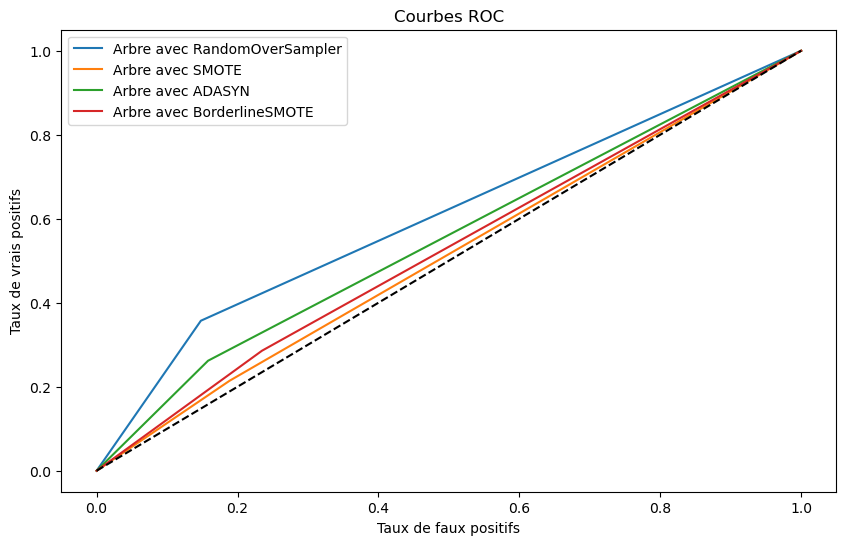

In [50]:
# Tracé des courbes ROC

from sklearn.metrics import roc_curve

fpr_arbre_oversampler, tpr_arbre_oversampler, _ = roc_curve(y_test, y_proba_arbre_oversampler)
fpr_arbre_smote, tpr_arbre_smote, _ = roc_curve(y_test, y_proba_arbre_smote)
fpr_arbre_adasyn, tpr_arbre_adasyn, _ = roc_curve(y_test, y_proba_arbre_adasyn)
fpr_arbre_bordeline_smote, tpr_arbre_bordeline_smote, _ = roc_curve(y_test, y_proba_arbre_bordeline_smote)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler, tpr_arbre_oversampler, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote, tpr_arbre_smote, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn, tpr_arbre_adasyn, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_bordeline_smote, tpr_arbre_bordeline_smote, label='Arbre avec BorderlineSMOTE')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

#### C) Ajustement des hyperparamètres

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

# Définition de la grille des hyperparamètres pour l'arbre de décision
param_grid = {
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], # Critère d'impureté 
    'arbre__max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score), 
    'Recall': make_scorer(recall_score),
    'AUC': 'roc_auc'
}

In [52]:
pipelines = {
    'oversampler': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('oversampler', RandomOverSampler()), 
        ('arbre', DecisionTreeClassifier())
    ]),
    'smote': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('smote', SMOTE()), 
        ('arbre', DecisionTreeClassifier())
    ]),
    'adasyn': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('adasyn', ADASYN()), 
        ('arbre', DecisionTreeClassifier())
    ]),
    'bordeline_smote': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('bordeline_smote', BorderlineSMOTE()), 
        ('arbre', DecisionTreeClassifier())
    ])
}

# On stocke les meilleurs paramètres pour chaque modèle
best_params = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, refit='F1', cv=5)
    grid_search.fit(X_train, y_train)
    best_params[name] = grid_search.best_params_
    print(f"Meilleurs paramètres pour {name} : {grid_search.best_params_}")

# On stocke les meilleurs modèles
best_models = {}
for name, pipeline in pipelines.items():
    best_models[name] = grid_search.best_estimator_

Meilleurs paramètres pour oversampler : {'arbre__criterion': 'gini', 'arbre__max_depth': 40, 'arbre__min_samples_leaf': 2, 'arbre__min_samples_split': 20}
Meilleurs paramètres pour smote : {'arbre__criterion': 'log_loss', 'arbre__max_depth': 100, 'arbre__min_samples_leaf': 4, 'arbre__min_samples_split': 5}
Meilleurs paramètres pour adasyn : {'arbre__criterion': 'entropy', 'arbre__max_depth': 10, 'arbre__min_samples_leaf': 4, 'arbre__min_samples_split': 10}
Meilleurs paramètres pour bordeline_smote : {'arbre__criterion': 'log_loss', 'arbre__max_depth': 40, 'arbre__min_samples_leaf': 1, 'arbre__min_samples_split': 30}


In [53]:
# Prédictions
y_proba_arbre_oversampler_cv = best_models['oversampler'].predict_proba(X_test)[:, 1]
y_proba_arbre_smote_cv = best_models['smote'].predict_proba(X_test)[:, 1]
y_proba_arbre_adasyn_cv = best_models['adasyn'].predict_proba(X_test)[:, 1]
y_proba_arbre_bordeline_smote_cv = best_models['bordeline_smote'].predict_proba(X_test)[:, 1]

#### D) Mesure de la performance des modèles optimisés

In [57]:
# Calcul des métriques

auc_roc_arbre_oversampler_cv = roc_auc_score(y_test, y_proba_arbre_oversampler_cv)
auc_pr_arbre_oversampler_cv = average_precision_score(y_test, y_proba_arbre_oversampler_cv)
# log_loss_value_arbre_oversampler_cv = log_loss(y_test, y_proba_arbre_oversampler_cv)
# precision_arbre_oversampler_cv = precision_score(y_test, y_proba_arbre_oversampler_cv)
# recall_arbre_oversampler_cv = recall_score(y_test, y_proba_arbre_oversampler_cv)
# f1_arbre_oversampler_cv = f1_score(y_test, y_proba_arbre_oversampler_cv)
# mcc_arbre_oversampler_cv = matthews_corrcoef(y_test, y_proba_arbre_oversampler_cv)
# balanced_acc_arbre_oversampler_cv = balanced_accuracy_score(y_test, y_proba_arbre_oversampler_cv)

auc_roc_arbre_smote_cv = roc_auc_score(y_test, y_proba_arbre_smote_cv)
auc_pr_arbre_smote_cv = average_precision_score(y_test, y_proba_arbre_smote_cv)
# log_loss_value_arbre_smote_cv = log_loss(y_test, y_proba_arbre_smote_cv)
# precision_arbre_smote_cv = precision_score(y_test, y_proba_arbre_smote_cv)
# recall_arbre_smote_cv = recall_score(y_test, y_proba_arbre_smote_cv)
# f1_arbre_smote_cv = f1_score(y_test, y_proba_arbre_smote_cv)
# mcc_arbre_smote_cv = matthews_corrcoef(y_test, y_proba_arbre_smote_cv)
# balanced_acc_arbre_smote_cv = balanced_accuracy_score(y_test, y_proba_arbre_smote_cv)

auc_roc_arbre_adasyn_cv = roc_auc_score(y_test, y_proba_arbre_adasyn_cv)
auc_pr_arbre_adasyn_cv = average_precision_score(y_test, y_proba_arbre_adasyn_cv)
# log_loss_value_arbre_adasyn_cv = log_loss(y_test, y_proba_arbre_adasyn_cv)
# precision_arbre_adasyn_cv = precision_score(y_test, y_proba_arbre_adasyn_cv)
# recall_arbre_adasyn_cv = recall_score(y_test, y_proba_arbre_adasyn_cv)
# f1_arbre_adasyn_cv = f1_score(y_test, y_proba_arbre_adasyn_cv)
# mcc_arbre_adasyn_cv = matthews_corrcoef(y_test, y_proba_arbre_adasyn_cv)
# balanced_acc_arbre_adasyn_cv = balanced_accuracy_score(y_test, y_proba_arbre_adasyn_cv)

auc_roc_arbre_bordeline_smote_cv = roc_auc_score(y_test, y_proba_arbre_bordeline_smote_cv)
auc_pr_arbre_bordeline_smote_cv = average_precision_score(y_test, y_proba_arbre_bordeline_smote_cv)
# log_loss_value_arbre_bordeline_smote_cv = log_loss(y_test, y_proba_arbre_bordeline_smote_cv)
# precision_arbre_bordeline_smote_cv = precision_score(y_test, y_proba_arbre_bordeline_smote_cv)
# recall_arbre_bordeline_smote_cv = recall_score(y_test, y_proba_arbre_bordeline_smote_cv)
# f1_arbre_bordeline_smote_cv = f1_score(y_test, y_proba_arbre_bordeline_smote_cv)
# mcc_arbre_bordeline_smote_cv = matthews_corrcoef(y_test, y_proba_arbre_bordeline_smote_cv)
# balanced_acc_arbre_bordeline_smote_cv = balanced_accuracy_score(y_test, y_proba_arbre_bordeline_smote_cv)


In [58]:
# Affichage propre des résultats

resultats_arbres_cv = pd.DataFrame({
    "AUC-ROC": [auc_roc_arbre_oversampler_cv, auc_roc_arbre_smote_cv, auc_roc_arbre_adasyn_cv, auc_roc_arbre_bordeline_smote_cv],
    "AUC-PR": [auc_pr_arbre_oversampler_cv, auc_pr_arbre_smote_cv, auc_pr_arbre_adasyn_cv, auc_pr_arbre_bordeline_smote_cv],
    # "Log Loss": [log_loss_value_arbre_oversampler_cv, log_loss_value_arbre_smote_cv, log_loss_value_arbre_adasyn_cv, log_loss_value_arbre_bordeline_smote_cv],
    # "Précision": [precision_arbre_oversampler_cv, precision_arbre_smote_cv, precision_arbre_adasyn_cv, precision_arbre_bordeline_smote_cv],
    # "Rappel": [recall_arbre_oversampler_cv, recall_arbre_smote_cv, recall_arbre_adasyn_cv, recall_arbre_bordeline_smote_cv],
    # "F1 Score": [f1_arbre_oversampler_cv, f1_arbre_smote_cv, f1_arbre_adasyn_cv, f1_arbre_bordeline_smote_cv],
    # "MCC": [mcc_arbre_oversampler_cv, mcc_arbre_smote_cv, mcc_arbre_adasyn_cv, mcc_arbre_bordeline_smote_cv],
    # "Accuracy": [balanced_acc_arbre_oversampler_cv, balanced_acc_arbre_smote_cv, balanced_acc_arbre_adasyn_cv, balanced_acc_arbre_bordeline_smote_cv]
}, index=["Arbre - RandomOverSampler", "Arbre - SMOTE", "Arbre - ADASYN", "Arbre - BorderlineSMOTE"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres_cv = resultats_arbres_cv.round(3)
resultats_arbres_cv

,AUC-ROC,AUC-PR
Arbre - RandomOverSampler,0.491,0.185
Arbre - SMOTE,0.491,0.185
Arbre - ADASYN,0.491,0.185
Arbre - BorderlineSMOTE,0.491,0.185


In [ ]:
# Comparaison des courbes ROC

fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, _ = roc_curve(y_test, y_proba_arbre_oversampler_cv)
fpr_arbre_smote_cv, tpr_arbre_smote_cv, _ = roc_curve(y_test, y_proba_arbre_smote_cv)
fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, _ = roc_curve(y_test, y_proba_arbre_adasyn_cv)
fpr_arbre_bordeline_smote_cv, tpr_arbre_bordeline_smote_cv, _ = roc_curve(y_test, y_proba_arbre_bordeline_smote_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote_cv, tpr_arbre_smote_cv, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_bordeline_smote_cv, tpr_arbre_bordeline_smote_cv, label='Arbre avec BorderlineSMOTE')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

#### E) Importance des variables

In [ ]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_arbre_oversampler = best_models['oversampler'].named_steps['arbre'].feature_importances_
importances_arbre_smote = best_models['smote'].named_steps['arbre'].feature_importances_
importances_arbre_adasyn = best_models['adasyn'].named_steps['arbre'].feature_importances_
importances_arbre_bordeline_smote = best_models['bordeline_smote'].named_steps['arbre'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_arbre_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_oversampler
})

resultats_importance_variables_arbre_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_smote
})

resultats_importance_variables_arbre_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_adasyn
})

resultats_importance_variables_arbre_bordeline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_bordeline_smote
})

# Affichage des résultats
resultats_importance_variables_arbre_oversampler = resultats_importance_variables_arbre_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_smote = resultats_importance_variables_arbre_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_adasyn = resultats_importance_variables_arbre_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_bordeline_smote = resultats_importance_variables_arbre_bordeline_smote.sort_values(by="Importance", ascending=False)

resultats_importance_variables_arbre_oversampler

In [ ]:
resultats_importance_variables_arbre_smote

In [ ]:
resultats_importance_variables_arbre_adasyn

In [ ]:
resultats_importance_variables_arbre_bordeline_smote

In [ ]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_oversampler['Variable'], resultats_importance_variables_arbre_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_smote['Variable'], resultats_importance_variables_arbre_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_adasyn['Variable'], resultats_importance_variables_arbre_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_bordeline_smote['Variable'], resultats_importance_variables_arbre_bordeline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec BorderlineSMOTE')
plt.show()

### I.2.4. Forêts Aléatoires 

#### A) Construction des modèles

In [ ]:
# Construction du modèle de forêts aléatoires avec rééquilibrage des classes

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

etapes_rf_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('arbre', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('arbre', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN()), # Sur-échantillonnage
        ('arbre', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf_bordeline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('bordeline_smote', BorderlineSMOTE()), # Sur-échantillonnage
        ('rf', RandomForestClassifier()), # Forets aléatoires
        ]



modele_rf_oversampler = Pipeline(steps=etapes_rf_oversampler) # Création du pipeline
modele_rf_smote = Pipeline(steps=etapes_rf_smote) # Création du pipeline
modele_rf_adasyn = Pipeline(steps=etapes_rf_adasyn) # Création du pipeline
modele_rf_bordeline_smote = Pipeline(steps=etapes_rf_bordeline_smote) # Création du pipeline)

modele_rf_oversampler.fit(X_train, y_train) # Entraînement
modele_rf_smote.fit(X_train, y_train) # Entraînement
modele_rf_adasyn.fit(X_train, y_train) # Entraînement
modele_rf_bordeline_smote.fit(X_train, y_train) # Entraînement

In [ ]:
# Prédictions

y_proba_rf_oversampler = modele_rf_oversampler.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler = modele_rf_oversampler.predict(X_test)

y_proba_rf_smote = modele_rf_smote.predict_proba(X_test)[:, 1]
y_pred_rf_smote = modele_rf_smote.predict(X_test)

y_proba_rf_adasyn = modele_rf_adasyn.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn = modele_rf_adasyn.predict(X_test)

y_proba_rf_bordeline_smote = modele_rf_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_rf_bordeline_smote = modele_rf_bordeline_smote.predict(X_test)

#### B) Mesure de la performance des modèles initiaux

In [ ]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_rf_oversampler = roc_auc_score(y_test, y_proba_rf_oversampler)
auc_pr_rf_oversampler = average_precision_score(y_test, y_proba_rf_oversampler)
log_loss_value_rf_oversampler = log_loss(y_test, y_proba_rf_oversampler)
precision_rf_oversampler = precision_score(y_test, y_pred_rf_oversampler)
recall_rf_oversampler = recall_score(y_test, y_pred_rf_oversampler)
f1_rf_oversampler = f1_score(y_test, y_pred_rf_oversampler)
mcc_rf_oversampler = matthews_corrcoef(y_test, y_pred_rf_oversampler)
balanced_acc_rf_oversampler = balanced_accuracy_score(y_test, y_pred_rf_oversampler)
specificity_rf_oversampler = confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_rf_oversampler)[0, 1])
cohen_kappa_rf_oversampler = cohen_kappa_score(y_test, y_pred_rf_oversampler)

auc_roc_rf_smote = roc_auc_score(y_test, y_proba_rf_smote)
auc_pr_rf_smote = average_precision_score(y_test, y_proba_rf_smote)
log_loss_value_rf_smote = log_loss(y_test, y_proba_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote)
mcc_rf_smote = matthews_corrcoef(y_test, y_pred_rf_smote)
balanced_acc_rf_smote = balanced_accuracy_score(y_test, y_pred_rf_smote)
specificity_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_smote)[0, 1])
cohen_kappa_rf_smote = cohen_kappa_score(y_test, y_pred_rf_smote)

auc_roc_rf_adasyn = roc_auc_score(y_test, y_proba_rf_adasyn)
auc_pr_rf_adasyn = average_precision_score(y_test, y_proba_rf_adasyn)
log_loss_value_rf_adasyn = log_loss(y_test, y_proba_rf_adasyn)
precision_rf_adasyn = precision_score(y_test, y_pred_rf_adasyn)
recall_rf_adasyn = recall_score(y_test, y_pred_rf_adasyn)
f1_rf_adasyn = f1_score(y_test, y_pred_rf_adasyn)
mcc_rf_adasyn = matthews_corrcoef(y_test, y_pred_rf_adasyn)
balanced_acc_rf_adasyn = balanced_accuracy_score(y_test, y_pred_rf_adasyn)
specificity_rf_adasyn = confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_rf_adasyn)[0, 1])
cohen_kappa_rf_adasyn = cohen_kappa_score(y_test, y_pred_rf_adasyn)

auc_roc_rf_bordeline_smote = roc_auc_score(y_test, y_proba_rf_bordeline_smote)
auc_pr_rf_bordeline_smote = average_precision_score(y_test, y_proba_rf_bordeline_smote)
log_loss_value_rf_bordeline_smote = log_loss(y_test, y_proba_rf_bordeline_smote)
precision_rf_bordeline_smote = precision_score(y_test, y_pred_rf_bordeline_smote)
recall_rf_bordeline_smote = recall_score(y_test, y_pred_rf_bordeline_smote)
f1_rf_bordeline_smote = f1_score(y_test, y_pred_rf_bordeline_smote)
mcc_rf_bordeline_smote = matthews_corrcoef(y_test, y_pred_rf_bordeline_smote)
balanced_acc_rf_bordeline_smote = balanced_accuracy_score(y_test, y_pred_rf_bordeline_smote)
specificity_rf_bordeline_smote = confusion_matrix(y_test, y_pred_rf_bordeline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_bordeline_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_bordeline_smote)[0, 1])
cohen_kappa_rf_bordeline_smote = cohen_kappa_score(y_test, y_pred_rf_bordeline_smote)

SyntaxError: incomplete input (764029348.py, line 9)

In [ ]:
# Affichage des résultats

resultats_rf = pd.DataFrame({
    "AUC-ROC": [auc_roc_rf_oversampler, auc_roc_rf_smote, auc_roc_rf_adasyn, auc_roc_rf_bordeline_smote],
    "AUC-PR": [auc_pr_rf_oversampler, auc_pr_rf_smote, auc_pr_rf_adasyn, auc_pr_rf_bordeline_smote],
    "Log Loss": [log_loss_value_rf_oversampler, log_loss_value_rf_smote, log_loss_value_rf_adasyn, log_loss_value_rf_bordeline_smote],
    #"Précision": [precision_rf_oversampler, precision_rf_smote, precision_rf_adasyn, precision_rf_bordeline_smote],
    #"Rappel": [recall_rf_oversampler, recall_rf_smote, recall_rf_adasyn, recall_rf_bordeline_smote],
    "F1 Score": [f1_rf_oversampler, f1_rf_smote, f1_rf_adasyn, f1_rf_bordeline_smote],
    "MCC": [mcc_rf_oversampler, mcc_rf_smote, mcc_rf_adasyn, mcc_rf_bordeline_smote],
    "Accuracy": [balanced_acc_rf_oversampler, balanced_acc_rf_smote, balanced_acc_rf_adasyn, balanced_acc_rf_bordeline_smote],
    "Spécificité": [specificity_rf_oversampler, specificity_rf_smote, specificity_rf_adasyn, specificity_rf_bordeline_smote],
    "Kappa de Cohen": [cohen_kappa_rf_oversampler, cohen_kappa_rf_smote, cohen_kappa_rf_adasyn, cohen_kappa_rf_bordeline_smote]
}, index=["RF - RandomOverSampler", "RF - SMOTE", "RF - ADASYN", "RF - BorderlineSMOTE"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf = resultats_rf.round(3)
resultats_rf

In [ ]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_rf_oversampler, tpr_rf_oversampler, _ = roc_curve(y_test, y_proba_rf_oversampler)
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_proba_rf_smote)
fpr_rf_adasyn, tpr_rf_adasyn, _ = roc_curve(y_test, y_proba_rf_adasyn)
fpr_rf_bordeline_smote, tpr_rf_bordeline_smote, _ = roc_curve(y_test, y_proba_rf_bordeline_smote)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler, tpr_rf_oversampler, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote, tpr_rf_smote, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn, tpr_rf_adasyn, label='RF avec ADASYN')
plt.plot(fpr_rf_bordeline_smote, tpr_rf_bordeline_smote, label='RF avec BorderlineSMOTE')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

NameError: name 'y_test' is not defined

#### C) Ajustement des hyperparamètres

In [ ]:
# Ajustement des hyperparamètres par validation croisée

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

# Définition de la grille des hyperparamètres pour les forêts aléatoires

param_grid = {
    'rf__n_estimators': [100, 200, 300, 400, 500], # Nombre d'arbres
    'rf__criterion': ['gini', 'entropy'], # Critère d'impureté
    'rf__max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], # Profondeur maximale de l'arbre
    'rf__min_samples_split': [2, 5, 10, 20, 30], # Nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score), 
    'Recall': make_scorer(recall_score),
    'AUC': 'roc_auc'
}

In [ ]:
# Pipelines

pipelines = {
    'oversampler': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('oversampler', RandomOverSampler()), 
        ('rf', RandomForestClassifier())
    ]),
    'smote': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('smote', SMOTE()), 
        ('rf', RandomForestClassifier())
    ]),
    'adasyn': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('adasyn', ADASYN()), 
        ('rf', RandomForestClassifier())
    ]),
    'bordeline_smote': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('bordeline_smote', BorderlineSMOTE()), 
        ('rf', RandomForestClassifier())
    ])
}

# On stocke les meilleurs paramètres pour chaque modèle
best_params = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, refit='F1', cv=5)
    grid_search.fit(X_train, y_train)
    best_params[name] = grid_search.best_params_
    print(f"Meilleurs paramètres pour {name} : {grid_search.best_params_}")

# On stocke les meilleurs modèles
best_models = {}
for name, pipeline in pipelines.items():
    best_models[name] = grid_search.best_estimator_

In [ ]:
# Prédictions

y_proba_rf_oversampler_cv = best_models['oversampler'].predict_proba(X_test)[:, 1]
y_proba_rf_smote_cv = best_models['smote'].predict_proba(X_test)[:, 1]
y_proba_rf_adasyn_cv = best_models['adasyn'].predict_proba(X_test)[:, 1]
y_proba_rf_bordeline_smote_cv = best_models['bordeline_smote'].predict_proba(X_test)[:, 1]

#### D) Mesure de la performance des modèles optimisés

In [ ]:
# Calcul des métriques

auc_roc_rf_oversampler_cv = roc_auc_score(y_test, y_proba_rf_oversampler_cv)
auc_pr_rf_oversampler_cv = average_precision_score(y_test, y_proba_rf_oversampler_cv)
log_loss_value_rf_oversampler_cv = log_loss(y_test, y_proba_rf_oversampler_cv)
precision_rf_oversampler_cv = precision_score(y_test, y_proba_rf_oversampler_cv)
recall_rf_oversampler_cv = recall_score(y_test, y_proba_rf_oversampler_cv)
f1_rf_oversampler_cv = f1_score(y_test, y_proba_rf_oversampler_cv)
mcc_rf_oversampler_cv = matthews_corrcoef(y_test, y_proba_rf_oversampler_cv)
balanced_acc_rf_oversampler_cv = balanced_accuracy_score(y_test, y_proba_rf_oversampler_cv)

auc_roc_rf_smote_cv = roc_auc_score(y_test, y_proba_rf_smote_cv)
auc_pr_rf_smote_cv = average_precision_score(y_test, y_proba_rf_smote_cv)
log_loss_value_rf_smote_cv = log_loss(y_test, y_proba_rf_smote_cv)
precision_rf_smote_cv = precision_score(y_test, y_proba_rf_smote_cv)
recall_rf_smote_cv = recall_score(y_test, y_proba_rf_smote_cv)
f1_rf_smote_cv = f1_score(y_test, y_proba_rf_smote_cv)
mcc_rf_smote_cv = matthews_corrcoef(y_test, y_proba_rf_smote_cv)
balanced_acc_rf_smote_cv = balanced_accuracy_score(y_test, y_proba_rf_smote_cv)

auc_roc_rf_adasyn_cv = roc_auc_score(y_test, y_proba_rf_adasyn_cv)
auc_pr_rf_adasyn_cv = average_precision_score(y_test, y_proba_rf_adasyn_cv)
log_loss_value_rf_adasyn_cv = log_loss(y_test, y_proba_rf_adasyn_cv)
precision_rf_adasyn_cv = precision_score(y_test, y_proba_rf_adasyn_cv)
recall_rf_adasyn_cv = recall_score(y_test, y_proba_rf_adasyn_cv)
f1_rf_adasyn_cv = f1_score(y_test, y_proba_rf_adasyn_cv)
mcc_rf_adasyn_cv = matthews_corrcoef(y_test, y_proba_rf_adasyn_cv)
balanced_acc_rf_adasyn_cv = balanced_accuracy_score(y_test, y_proba_rf_adasyn_cv)

auc_roc_rf_bordeline_smote_cv = roc_auc_score(y_test, y_proba_rf_bordeline_smote_cv)
auc_pr_rf_bordeline_smote_cv = average_precision_score(y_test, y_proba_rf_bordeline_smote_cv)
log_loss_value_rf_bordeline_smote_cv = log_loss(y_test, y_proba_rf_bordeline_smote_cv)
precision_rf_bordeline_smote_cv = precision_score(y_test, y_proba_rf_bordeline_smote_cv)
recall_rf_bordeline_smote_cv = recall_score(y_test, y_proba_rf_bordeline_smote_cv)
f1_rf_bordeline_smote_cv = f1_score(y_test, y_proba_rf_bordeline_smote_cv)
mcc_rf_bordeline_smote_cv = matthews_corrcoef(y_test, y_proba_rf_bordeline_smote_cv)
balanced_acc_rf_bordeline_smote_cv = balanced_accuracy_score(y_test, y_proba_rf_bordeline_smote_cv)

In [ ]:
# Affichage des résultats

resultats_rf_cv = pd.DataFrame({
    "AUC-ROC": [auc_roc_rf_oversampler_cv, auc_roc_rf_smote_cv, auc_roc_rf_adasyn_cv, auc_roc_rf_bordeline_smote_cv],
    "AUC-PR": [auc_pr_rf_oversampler_cv, auc_pr_rf_smote_cv, auc_pr_rf_adasyn_cv, auc_pr_rf_bordeline_smote_cv],
    "Log Loss": [log_loss_value_rf_oversampler_cv, log_loss_value_rf_smote_cv, log_loss_value_rf_adasyn_cv, log_loss_value_rf_bordeline_smote_cv],
    "Précision": [precision_rf_oversampler_cv, precision_rf_smote_cv, precision_rf_adasyn_cv, precision_rf_bordeline_smote_cv],
    "Rappel": [recall_rf_oversampler_cv, recall_rf_smote_cv, recall_rf_adasyn_cv, recall_rf_bordeline_smote_cv],
    "F1 Score": [f1_rf_oversampler_cv, f1_rf_smote_cv, f1_rf_adasyn_cv, f1_rf_bordeline_smote_cv],
    "MCC": [mcc_rf_oversampler_cv, mcc_rf_smote_cv, mcc_rf_adasyn_cv, mcc_rf_bordeline_smote_cv],
    "Accuracy": [balanced_acc_rf_oversampler_cv, balanced_acc_rf_smote_cv, balanced_acc_rf_adasyn_cv, balanced_acc_rf_bordeline_smote_cv]
}, index=["RF - RandomOverSampler", "RF - SMOTE", "RF - ADASYN", "RF - BorderlineSMOTE"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf_cv = resultats_rf_cv.round(3)
resultats_rf_cv

In [ ]:
# Comparaison des courbes ROC

fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, _ = roc_curve(y_test, y_proba_rf_oversampler_cv)
fpr_rf_smote_cv, tpr_rf_smote_cv, _ = roc_curve(y_test, y_proba_rf_smote_cv)
fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, _ = roc_curve(y_test, y_proba_rf_adasyn_cv)
fpr_rf_bordeline_smote_cv, tpr_rf_bordeline_smote_cv, _ = roc_curve(y_test, y_proba_rf_bordeline_smote_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote_cv, tpr_rf_smote_cv, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, label='RF avec ADASYN')
plt.plot(fpr_rf_bordeline_smote_cv, tpr_rf_bordeline_smote_cv, label='RF avec BorderlineSMOTE')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()


#### E) Importance des variables

In [ ]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_rf_oversampler = best_models['oversampler'].named_steps['rf'].feature_importances_
importances_rf_smote = best_models['smote'].named_steps['rf'].feature_importances_
importances_rf_adasyn = best_models['adasyn'].named_steps['rf'].feature_importances_
importances_rf_bordeline_smote = best_models['bordeline_smote'].named_steps['rf'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_rf_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_rf_oversampler
})

resultats_importance_variables_rf_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_rf_smote
})

resultats_importance_variables_rf_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_rf_adasyn
})

resultats_importance_variables_rf_bordeline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_rf_bordeline_smote
})

# Affichage des résultats
resultats_importance_variables_rf_oversampler = resultats_importance_variables_rf_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_smote = resultats_importance_variables_rf_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_adasyn = resultats_importance_variables_rf_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_bordeline_smote = resultats_importance_variables_rf_bordeline_smote.sort_values(by="Importance", ascending=False)

resultats_importance_variables_rf_oversampler

In [ ]:
resultats_importance_variables_rf_smote

In [ ]:
resultats_importance_variables_rf_adasyn

In [ ]:
resultats_importance_variables_rf_bordeline_smote

In [ ]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_oversampler['Variable'], resultats_importance_variables_rf_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_smote['Variable'], resultats_importance_variables_rf_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_adasyn['Variable'], resultats_importance_variables_rf_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_bordeline_smote['Variable'], resultats_importance_variables_rf_bordeline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec BorderlineSMOTE')
plt.show()


### I.2.4. Gradient Boosting

#### A) Construction des modèles

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# Construction des étapes
etapes_gb_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN()), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_bordeline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('bordeline_smote', BorderlineSMOTE()), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

modele_gb_randomoversampler = Pipeline(steps=etapes_gb_randomoversampler) # Création du pipeline
modele_gb_smote = Pipeline(steps=etapes_gb_smote) # Création du pipeline
modele_gb_adasyn = Pipeline(steps=etapes_gb_adasyn) # Création du pipeline
modele_gb_bordeline_smote = Pipeline(steps=etapes_gb_bordeline_smote) # Création du pipeline

In [ ]:
# Entraînement des modèles
modele_gb_randomoversampler.fit(X_train, y_train) # Entraînement
modele_gb_smote.fit(X_train, y_train) # Entraînement
modele_gb_adasyn.fit(X_train, y_train) # Entraînement
modele_gb_bordeline_smote.fit(X_train, y_train) # Entraînement

In [ ]:
# Prédictions

y_proba_gb_randomoversampler = modele_gb_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler = modele_gb_randomoversampler.predict(X_test)

y_proba_gb_smote = modele_gb_smote.predict_proba(X_test)[:, 1]
y_pred_gb_smote = modele_gb_smote.predict(X_test)

y_proba_gb_adasyn = modele_gb_adasyn.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn = modele_gb_adasyn.predict(X_test)

y_proba_gb_bordeline_smote = modele_gb_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_gb_bordeline_smote = modele_gb_bordeline_smote.predict(X_test)

#### B) Mesure de la performance des modèles initiaux

In [ ]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

auc_roc_gb_randomoversampler = roc_auc_score(y_test, y_proba_gb_randomoversampler)
auc_pr_gb_randomoversampler = average_precision_score(y_test, y_proba_gb_randomoversampler)
log_loss_value_gb_randomoversampler = log_loss(y_test, y_proba_gb_randomoversampler)
precision_gb_randomoversampler = precision_score(y_test, y_pred_gb_randomoversampler)
recall_gb_randomoversampler = recall_score(y_test, y_pred_gb_randomoversampler)
f1_gb_randomoversampler = f1_score(y_test, y_pred_gb_randomoversampler)
mcc_gb_randomoversampler = matthews_corrcoef(y_test, y_pred_gb_randomoversampler)
balanced_acc_gb_randomoversampler = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler)
specificity_gb_randomoversampler = confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 1])
cohen_kappa_gb_randomoversampler = cohen_kappa_score(y_test, y_pred_gb_randomoversampler)

auc_roc_gb_smote = roc_auc_score(y_test, y_proba_gb_smote)
auc_pr_gb_smote = average_precision_score(y_test, y_proba_gb_smote)
log_loss_value_gb_smote = log_loss(y_test, y_proba_gb_smote)
precision_gb_smote = precision_score(y_test, y_pred_gb_smote)
recall_gb_smote = recall_score(y_test, y_pred_gb_smote)
f1_gb_smote = f1_score(y_test, y_pred_gb_smote)
mcc_gb_smote = matthews_corrcoef(y_test, y_pred_gb_smote)
balanced_acc_gb_smote = balanced_accuracy_score(y_test, y_pred_gb_smote)
specificity_gb_smote = confusion_matrix(y_test, y_pred_gb_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_smote)[0, 1])
cohen_kappa_gb_smote = cohen_kappa_score(y_test, y_pred_gb_smote)

auc_roc_gb_adasyn = roc_auc_score(y_test, y_proba_gb_adasyn)
auc_pr_gb_adasyn = average_precision_score(y_test, y_proba_gb_adasyn)
log_loss_value_gb_adasyn = log_loss(y_test, y_proba_gb_adasyn)
precision_gb_adasyn = precision_score(y_test, y_pred_gb_adasyn)
recall_gb_adasyn = recall_score(y_test, y_pred_gb_adasyn)
f1_gb_adasyn = f1_score(y_test, y_pred_gb_adasyn)
mcc_gb_adasyn = matthews_corrcoef(y_test, y_pred_gb_adasyn)
balanced_acc_gb_adasyn = balanced_accuracy_score(y_test, y_pred_gb_adasyn)
specificity_gb_adasyn = confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_gb_adasyn)[0, 1])
cohen_kappa_gb_adasyn = cohen_kappa_score(y_test, y_pred_gb_adasyn)

auc_roc_gb_bordeline_smote = roc_auc_score(y_test, y_proba_gb_bordeline_smote)
auc_pr_gb_bordeline_smote = average_precision_score(y_test, y_proba_gb_bordeline_smote)
log_loss_value_gb_bordeline_smote = log_loss(y_test, y_proba_gb_bordeline_smote)
precision_gb_bordeline_smote = precision_score(y_test, y_pred_gb_bordeline_smote)
recall_gb_bordeline_smote = recall_score(y_test, y_pred_gb_bordeline_smote)
f1_gb_bordeline_smote = f1_score(y_test, y_pred_gb_bordeline_smote)
mcc_gb_bordeline_smote = matthews_corrcoef(y_test, y_pred_gb_bordeline_smote)
balanced_acc_gb_bordeline_smote = balanced_accuracy_score(y_test, y_pred_gb_bordeline_smote)
specificity_gb_bordeline_smote = confusion_matrix(y_test, y_pred_gb_bordeline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_bordeline_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_bordeline_smote)[0, 1])
cohen_kappa_gb_bordeline_smote = cohen_kappa_score(y_test, y_pred_gb_bordeline_smote)

In [ ]:
# Affichage des résultats
resultats_gb = pd.DataFrame({
    "AUC-ROC": [auc_roc_gb_randomoversampler, auc_roc_gb_smote, auc_roc_gb_adasyn, auc_roc_gb_bordeline_smote],
    "AUC-PR": [auc_pr_gb_randomoversampler, auc_pr_gb_smote, auc_pr_gb_adasyn, auc_pr_gb_bordeline_smote],
    "Log Loss": [log_loss_value_gb_randomoversampler, log_loss_value_gb_smote, log_loss_value_gb_adasyn, log_loss_value_gb_bordeline_smote],
    #"Précision": [precision_gb_randomoversampler, precision_gb_smote, precision_gb_adasyn, precision_gb_bordeline_smote],
    #"Rappel": [recall_gb_randomoversampler, recall_gb_smote, recall_gb_adasyn, recall_gb_bordeline_smote],
    "F1 Score": [f1_gb_randomoversampler, f1_gb_smote, f1_gb_adasyn, f1_gb_bordeline_smote],
    "MCC": [mcc_gb_randomoversampler, mcc_gb_smote, mcc_gb_adasyn, mcc_gb_bordeline_smote],
    "Accuracy": [balanced_acc_gb_randomoversampler, balanced_acc_gb_smote, balanced_acc_gb_adasyn, balanced_acc_gb_bordeline_smote],
    "Spécificité": [specificity_gb_randomoversampler, specificity_gb_smote, specificity_gb_adasyn, specificity_gb_bordeline_smote],
    "Kappa de Cohen": [cohen_kappa_gb_randomoversampler, cohen_kappa_gb_smote, cohen_kappa_gb_adasyn, cohen_kappa_gb_bordeline_smote]
}, index=["GB - RandomOverSampler", "GB - SMOTE", "GB - ADASYN", "GB - BorderlineSMOTE"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb = resultats_gb.round(3)
resultats_gb

In [ ]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_gb_randomoversampler, tpr_gb_randomoversampler, _ = roc_curve(y_test, y_proba_gb_randomoversampler)
fpr_gb_smote, tpr_gb_smote, _ = roc_curve(y_test, y_proba_gb_smote)
fpr_gb_adasyn, tpr_gb_adasyn, _ = roc_curve(y_test, y_proba_gb_adasyn)
fpr_gb_bordeline_smote, tpr_gb_bordeline_smote, _ = roc_curve(y_test, y_proba_gb_bordeline_smote)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler, tpr_gb_randomoversampler, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote, tpr_gb_smote, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn, tpr_gb_adasyn, label='GB avec ADASYN')
plt.plot(fpr_gb_bordeline_smote, tpr_gb_bordeline_smote, label='GB avec BorderlineSMOTE')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

#### C) Ajustement des hyperparamètres

In [ ]:
# Ajustement des hyperparamètres par validation croisée

from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres pour le gradient boosting

param_grid = {
    'gb__n_estimators': [100, 200, 300, 400, 500], # Nombre d'arbres
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7, 9], # Profondeur maximale de l'arbre
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score), 
    'Recall': make_scorer(recall_score),
    'AUC': 'roc_auc'
}


In [ ]:
# Pipelines

pipelines = {
    'oversampler': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('oversampler', RandomOverSampler()), 
        ('gb', GradientBoostingClassifier())
    ]),
    'smote': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('smote', SMOTE()), 
        ('gb', GradientBoostingClassifier())
    ]),
    'adasyn': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('adasyn', ADASYN()), 
        ('gb', GradientBoostingClassifier())
    ]),
    'bordeline_smote': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('bordeline_smote', BorderlineSMOTE()), 
        ('gb', GradientBoostingClassifier())
    ])
}

# On stocke les meilleurs paramètres pour chaque modèle
best_params = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, refit='F1', cv=5)
    grid_search.fit(X_train, y_train)
    best_params[name] = grid_search.best_params_
    print(f"Meilleurs paramètres pour {name} : {grid_search.best_params_}")

# On stocke les meilleurs modèles
best_models = {}
for name, pipeline in pipelines.items():
    best_models[name] = grid_search.best_estimator_


In [ ]:
# Prédictions

y_proba_gb_randomoversampler_cv = best_models['oversampler'].predict_proba(X_test)[:, 1]
y_proba_gb_smote_cv = best_models['smote'].predict_proba(X_test)[:, 1]
y_proba_gb_adasyn_cv = best_models['adasyn'].predict_proba(X_test)[:, 1]
y_proba_gb_bordeline_smote_cv = best_models['bordeline_smote'].predict_proba(X_test)[:, 1]


#### D) Mesure de la performance des modèles optimisés

In [ ]:
# Calcul des métriques

auc_roc_gb_randomoversampler_cv = roc_auc_score(y_test, y_proba_gb_randomoversampler_cv)
auc_pr_gb_randomoversampler_cv = average_precision_score(y_test, y_proba_gb_randomoversampler_cv)
log_loss_value_gb_randomoversampler_cv = log_loss(y_test, y_proba_gb_randomoversampler_cv)
precision_gb_randomoversampler_cv = precision_score(y_test, y_proba_gb_randomoversampler_cv)
recall_gb_randomoversampler_cv = recall_score(y_test, y_proba_gb_randomoversampler_cv)
f1_gb_randomoversampler_cv = f1_score(y_test, y_proba_gb_randomoversampler_cv)
mcc_gb_randomoversampler_cv = matthews_corrcoef(y_test, y_proba_gb_randomoversampler_cv)
balanced_acc_gb_randomoversampler_cv = balanced_accuracy_score(y_test, y_proba_gb_randomoversampler_cv)

auc_roc_gb_smote_cv = roc_auc_score(y_test, y_proba_gb_smote_cv)
auc_pr_gb_smote_cv = average_precision_score(y_test, y_proba_gb_smote_cv)
log_loss_value_gb_smote_cv = log_loss(y_test, y_proba_gb_smote_cv)
precision_gb_smote_cv = precision_score(y_test, y_proba_gb_smote_cv)
recall_gb_smote_cv = recall_score(y_test, y_proba_gb_smote_cv)
f1_gb_smote_cv = f1_score(y_test, y_proba_gb_smote_cv)
mcc_gb_smote_cv = matthews_corrcoef(y_test, y_proba_gb_smote_cv)
balanced_acc_gb_smote_cv = balanced_accuracy_score(y_test, y_proba_gb_smote_cv)

auc_roc_gb_adasyn_cv = roc_auc_score(y_test, y_proba_gb_adasyn_cv)
auc_pr_gb_adasyn_cv = average_precision_score(y_test, y_proba_gb_adasyn_cv)
log_loss_value_gb_adasyn_cv = log_loss(y_test, y_proba_gb_adasyn_cv)
precision_gb_adasyn_cv = precision_score(y_test, y_proba_gb_adasyn_cv)
recall_gb_adasyn_cv = recall_score(y_test, y_proba_gb_adasyn_cv)
f1_gb_adasyn_cv = f1_score(y_test, y_proba_gb_adasyn_cv)
mcc_gb_adasyn_cv = matthews_corrcoef(y_test, y_proba_gb_adasyn_cv)
balanced_acc_gb_adasyn_cv = balanced_accuracy_score(y_test, y_proba_gb_adasyn_cv)

auc_roc_gb_bordeline_smote_cv = roc_auc_score(y_test, y_proba_gb_bordeline_smote_cv)
auc_pr_gb_bordeline_smote_cv = average_precision_score(y_test, y_proba_gb_bordeline_smote_cv)
log_loss_value_gb_bordeline_smote_cv = log_loss(y_test, y_proba_gb_bordeline_smote_cv)
precision_gb_bordeline_smote_cv = precision_score(y_test, y_proba_gb_bordeline_smote_cv)
recall_gb_bordeline_smote_cv = recall_score(y_test, y_proba_gb_bordeline_smote_cv)
f1_gb_bordeline_smote_cv = f1_score(y_test, y_proba_gb_bordeline_smote_cv)
mcc_gb_bordeline_smote_cv = matthews_corrcoef(y_test, y_proba_gb_bordeline_smote_cv)
balanced_acc_gb_bordeline_smote_cv = balanced_accuracy_score(y_test, y_proba_gb_bordeline_smote_cv)

In [ ]:
# Affichage des résultats

resultats_gb_cv = pd.DataFrame({
    "AUC-ROC": [auc_roc_gb_randomoversampler_cv, auc_roc_gb_smote_cv, auc_roc_gb_adasyn_cv, auc_roc_gb_bordeline_smote_cv],
    "AUC-PR": [auc_pr_gb_randomoversampler_cv, auc_pr_gb_smote_cv, auc_pr_gb_adasyn_cv, auc_pr_gb_bordeline_smote_cv],
    "Log Loss": [log_loss_value_gb_randomoversampler_cv, log_loss_value_gb_smote_cv, log_loss_value_gb_adasyn_cv, log_loss_value_gb_bordeline_smote_cv],
    "Précision": [precision_gb_randomoversampler_cv, precision_gb_smote_cv, precision_gb_adasyn_cv, precision_gb_bordeline_smote_cv],
    "Rappel": [recall_gb_randomoversampler_cv, recall_gb_smote_cv, recall_gb_adasyn_cv, recall_gb_bordeline_smote_cv],
    "F1 Score": [f1_gb_randomoversampler_cv, f1_gb_smote_cv, f1_gb_adasyn_cv, f1_gb_bordeline_smote_cv],
    "MCC": [mcc_gb_randomoversampler_cv, mcc_gb_smote_cv, mcc_gb_adasyn_cv, mcc_gb_bordeline_smote_cv],
    "Accuracy": [balanced_acc_gb_randomoversampler_cv, balanced_acc_gb_smote_cv, balanced_acc_gb_adasyn_cv, balanced_acc_gb_bordeline_smote_cv]
}, index=["GB - RandomOverSampler", "GB - SMOTE", "GB - ADASYN", "GB - BorderlineSMOTE"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb_cv = resultats_gb_cv.round(3)
resultats_gb_cv

### I.2.5. Adaboost

#### A) Construction des modèles

In [ ]:
# Construction des modèles
from sklearn.ensemble import AdaBoostClassifier

etapes_adaboost_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN()), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_bordeline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('bordeline_smote', BorderlineSMOTE()), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

modele_adaboost_randomoversampler = Pipeline(steps=etapes_adaboost_randomoversampler) # Création du pipeline
modele_adaboost_smote = Pipeline(steps=etapes_adaboost_smote) # Création du pipeline
modele_adaboost_adasyn = Pipeline(steps=etapes_adaboost_adasyn) # Création du pipeline
modele_adaboost_bordeline_smote = Pipeline(steps=etapes_adaboost_bordeline_smote) # Création du pipeline

In [ ]:
modele_adaboost_randomoversampler.fit(X_train, y_train) # Entraînement
modele_adaboost_smote.fit(X_train, y_train) # Entraînement
modele_adaboost_adasyn.fit(X_train, y_train) # Entraînement
modele_adaboost_bordeline_smote.fit(X_train, y_train) # Entraînement

In [ ]:
# Prédictions

y_proba_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict(X_test)

y_proba_adaboost_smote = modele_adaboost_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote = modele_adaboost_smote.predict(X_test)

y_proba_adaboost_adasyn = modele_adaboost_adasyn.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn = modele_adaboost_adasyn.predict(X_test)

y_proba_adaboost_bordeline_smote = modele_adaboost_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_bordeline_smote = modele_adaboost_bordeline_smote.predict(X_test)

#### B) Mesure de la performance des modèles initiaux

In [ ]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler = roc_auc_score(y_test, y_proba_adaboost_randomoversampler)
auc_pr_adaboost_randomoversampler = average_precision_score(y_test, y_proba_adaboost_randomoversampler)
log_loss_value_adaboost_randomoversampler = log_loss(y_test, y_proba_adaboost_randomoversampler)
precision_adaboost_randomoversampler = precision_score(y_test, y_pred_adaboost_randomoversampler)
recall_adaboost_randomoversampler = recall_score(y_test, y_pred_adaboost_randomoversampler)
f1_adaboost_randomoversampler = f1_score(y_test, y_pred_adaboost_randomoversampler)
mcc_adaboost_randomoversampler = matthews_corrcoef(y_test, y_pred_adaboost_randomoversampler)
balanced_acc_adaboost_randomoversampler = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler)
specificity_adaboost_randomoversampler = confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 1])
cohen_kappa_adaboost_randomoversampler = cohen_kappa_score(y_test, y_pred_adaboost_randomoversampler)

auc_roc_adaboost_smote = roc_auc_score(y_test, y_proba_adaboost_smote)
auc_pr_adaboost_smote = average_precision_score(y_test, y_proba_adaboost_smote)
log_loss_value_adaboost_smote = log_loss(y_test, y_proba_adaboost_smote)
precision_adaboost_smote = precision_score(y_test, y_pred_adaboost_smote)
recall_adaboost_smote = recall_score(y_test, y_pred_adaboost_smote)
f1_adaboost_smote = f1_score(y_test, y_pred_adaboost_smote)
mcc_adaboost_smote = matthews_corrcoef(y_test, y_pred_adaboost_smote)
balanced_acc_adaboost_smote = balanced_accuracy_score(y_test, y_pred_adaboost_smote)
specificity_adaboost_smote = confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_smote)[0, 1])
cohen_kappa_adaboost_smote = cohen_kappa_score(y_test, y_pred_adaboost_smote)

auc_roc_adaboost_adasyn = roc_auc_score(y_test, y_proba_adaboost_adasyn)
auc_pr_adaboost_adasyn = average_precision_score(y_test, y_proba_adaboost_adasyn)
log_loss_value_adaboost_adasyn = log_loss(y_test, y_proba_adaboost_adasyn)
precision_adaboost_adasyn = precision_score(y_test, y_pred_adaboost_adasyn)
recall_adaboost_adasyn = recall_score(y_test, y_pred_adaboost_adasyn)
f1_adaboost_adasyn = f1_score(y_test, y_pred_adaboost_adasyn)
mcc_adaboost_adasyn = matthews_corrcoef(y_test, y_pred_adaboost_adasyn)
balanced_acc_adaboost_adasyn = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn)
specificity_adaboost_adasyn = confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 1])
cohen_kappa_adaboost_adasyn = cohen_kappa_score(y_test, y_pred_adaboost_adasyn)

auc_roc_adaboost_bordeline_smote = roc_auc_score(y_test, y_proba_adaboost_bordeline_smote)
auc_pr_adaboost_bordeline_smote = average_precision_score(y_test, y_proba_adaboost_bordeline_smote)
log_loss_value_adaboost_bordeline_smote = log_loss(y_test, y_proba_adaboost_bordeline_smote)
precision_adaboost_bordeline_smote = precision_score(y_test, y_pred_adaboost_bordeline_smote)
recall_adaboost_bordeline_smote = recall_score(y_test, y_pred_adaboost_bordeline_smote)
f1_adaboost_bordeline_smote = f1_score(y_test, y_pred_adaboost_bordeline_smote)
mcc_adaboost_bordeline_smote = matthews_corrcoef(y_test, y_pred_adaboost_bordeline_smote)
balanced_acc_adaboost_bordeline_smote = balanced_accuracy_score(y_test, y_pred_adaboost_bordeline_smote)
specificity_adaboost_bordeline_smote = confusion_matrix(y_test, y_pred_adaboost_bordeline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_bordeline_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_bordeline_smote)[0, 1])
cohen_kappa_adaboost_bordeline_smote = cohen_kappa_score(y_test, y_pred_adaboost_bordeline_smote)

In [ ]:
# Affichage des résultats

resultats_adaboost = pd.DataFrame({
    "AUC-ROC" : [auc_roc_adaboost_randomoversampler, auc_roc_adaboost_smote, auc_roc_adaboost_adasyn, auc_roc_adaboost_bordeline_smote],
    "AUC-PR" : [auc_pr_adaboost_randomoversampler, auc_pr_adaboost_smote, auc_pr_adaboost_adasyn, auc_pr_adaboost_bordeline_smote],
    "Log Loss" : [log_loss_value_adaboost_randomoversampler, log_loss_value_adaboost_smote, log_loss_value_adaboost_adasyn, log_loss_value_adaboost_bordeline_smote],
    "Précision" : [precision_adaboost_randomoversampler, precision_adaboost_smote, precision_adaboost_adasyn, precision_adaboost_bordeline_smote],
    "Rappel" : [recall_adaboost_randomoversampler, recall_adaboost_smote, recall_adaboost_adasyn, recall_adaboost_bordeline_smote],
    "F1 Score" : [f1_adaboost_randomoversampler, f1_adaboost_smote, f1_adaboost_adasyn, f1_adaboost_bordeline_smote],
    "MCC" : [mcc_adaboost_randomoversampler, mcc_adaboost_smote, mcc_adaboost_adasyn, mcc_adaboost_bordeline_smote],
    "Accuracy" : [balanced_acc_adaboost_randomoversampler, balanced_acc_adaboost_smote, balanced_acc_adaboost_adasyn, balanced_acc_adaboost_bordeline_smote],
    "Spécificité" : [specificity_adaboost_randomoversampler, specificity_adaboost_smote, specificity_adaboost_adasyn, specificity_adaboost_bordeline_smote],
    "Kappa de Cohen" : [cohen_kappa_adaboost_randomoversampler, cohen_kappa_adaboost_smote, cohen_kappa_adaboost_adasyn, cohen_kappa_adaboost_bordeline_smote]
}, index=["AdaBoost - RandomOverSampler", "AdaBoost - SMOTE", "AdaBoost - ADASYN", "AdaBoost - BorderlineSMOTE"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost = resultats_adaboost.round(3)
resultats_adaboost    

In [ ]:
# Courbes ROC

fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler)
fpr_adaboost_smote, tpr_adaboost_smote, _ = roc_curve(y_test, y_proba_adaboost_smote)
fpr_adaboost_adasyn, tpr_adaboost_adasyn, _ = roc_curve(y_test, y_proba_adaboost_adasyn)
fpr_adaboost_bordeline_smote, tpr_adaboost_bordeline_smote, _ = roc_curve(y_test, y_proba_adaboost_bordeline_smote)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote, tpr_adaboost_smote, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn, tpr_adaboost_adasyn, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_bordeline_smote, tpr_adaboost_bordeline_smote, label='AdaBoost avec BorderlineSMOTE')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

#### C) Ajustement des hyperparamètres

In [ ]:
# Ajustement des hyperparamètres par validation croisée

# Définition de la grille des hyperparamètres pour le AdaBoost

param_grid = {
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score), 
    'Recall': make_scorer(recall_score),
    'AUC': 'roc_auc'
}


In [ ]:
# Pipelines

pipelines = {
    'oversampler': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('oversampler', RandomOverSampler()), 
        ('adaboost', AdaBoostClassifier())
    ]),
    'smote': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('smote', SMOTE()), 
        ('adaboost', AdaBoostClassifier())
    ]),
    'adasyn': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('adasyn', ADASYN()), 
        ('adaboost', AdaBoostClassifier())
    ]),
    'bordeline_smote': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('bordeline_smote', BorderlineSMOTE()), 
        ('adaboost', AdaBoostClassifier())
    ])
}

# On stocke les meilleurs paramètres pour chaque modèle
best_params = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, refit='F1', cv=5)
    grid_search.fit(X_train, y_train)
    best_params[name] = grid_search.best_params_
    print(f"Meilleurs paramètres pour {name} : {grid_search.best_params_}")

# On stocke les meilleurs modèles
best_models = {}
for name, pipeline in pipelines.items():
    best_models[name] = grid_search.best_estimator_


In [ ]:
# Prédictions

y_proba_adaboost_randomoversampler_cv = best_models['oversampler'].predict_proba(X_test)[:, 1]
y_proba_adaboost_smote_cv = best_models['smote'].predict_proba(X_test)[:, 1]
y_proba_adaboost_adasyn_cv = best_models['adasyn'].predict_proba(X_test)[:, 1]
y_proba_adaboost_bordeline_smote_cv = best_models['bordeline_smote'].predict_proba(X_test)[:, 1]

#### D) Mesure de la performance des modèles optimisés 

In [ ]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler_cv = roc_auc_score(y_test, y_proba_adaboost_randomoversampler_cv)
auc_pr_adaboost_randomoversampler_cv = average_precision_score(y_test, y_proba_adaboost_randomoversampler_cv)
log_loss_value_adaboost_randomoversampler_cv = log_loss(y_test, y_proba_adaboost_randomoversampler_cv)
precision_adaboost_randomoversampler_cv = precision_score(y_test, y_proba_adaboost_randomoversampler_cv)
recall_adaboost_randomoversampler_cv = recall_score(y_test, y_proba_adaboost_randomoversampler_cv)
f1_adaboost_randomoversampler_cv = f1_score(y_test, y_proba_adaboost_randomoversampler_cv)
mcc_adaboost_randomoversampler_cv = matthews_corrcoef(y_test, y_proba_adaboost_randomoversampler_cv)
balanced_acc_adaboost_randomoversampler_cv = balanced_accuracy_score(y_test, y_proba_adaboost_randomoversampler_cv)

auc_roc_adaboost_smote_cv = roc_auc_score(y_test, y_proba_adaboost_smote_cv)
auc_pr_adaboost_smote_cv = average_precision_score(y_test, y_proba_adaboost_smote_cv)
log_loss_value_adaboost_smote_cv = log_loss(y_test, y_proba_adaboost_smote_cv)
precision_adaboost_smote_cv = precision_score(y_test, y_proba_adaboost_smote_cv)
recall_adaboost_smote_cv = recall_score(y_test, y_proba_adaboost_smote_cv)
f1_adaboost_smote_cv = f1_score(y_test, y_proba_adaboost_smote_cv)
mcc_adaboost_smote_cv = matthews_corrcoef(y_test, y_proba_adaboost_smote_cv)
balanced_acc_adaboost_smote_cv = balanced_accuracy_score(y_test, y_proba_adaboost_smote_cv)

auc_roc_adaboost_adasyn_cv = roc_auc_score(y_test, y_proba_adaboost_adasyn_cv)
auc_pr_adaboost_adasyn_cv = average_precision_score(y_test, y_proba_adaboost_adasyn_cv)
log_loss_value_adaboost_adasyn_cv = log_loss(y_test, y_proba_adaboost_adasyn_cv)
precision_adaboost_adasyn_cv = precision_score(y_test, y_proba_adaboost_adasyn_cv)
recall_adaboost_adasyn_cv = recall_score(y_test, y_proba_adaboost_adasyn_cv)
f1_adaboost_adasyn_cv = f1_score(y_test, y_proba_adaboost_adasyn_cv)
mcc_adaboost_adasyn_cv = matthews_corrcoef(y_test, y_proba_adaboost_adasyn_cv)
balanced_acc_adaboost_adasyn_cv = balanced_accuracy_score(y_test, y_proba_adaboost_adasyn_cv)

auc_roc_adaboost_bordeline_smote_cv = roc_auc_score(y_test, y_proba_adaboost_bordeline_smote_cv)
auc_pr_adaboost_bordeline_smote_cv = average_precision_score(y_test, y_proba_adaboost_bordeline_smote_cv)
log_loss_value_adaboost_bordeline_smote_cv = log_loss(y_test, y_proba_adaboost_bordeline_smote_cv)
precision_adaboost_bordeline_smote_cv = precision_score(y_test, y_proba_adaboost_bordeline_smote_cv)
recall_adaboost_bordeline_smote_cv = recall_score(y_test, y_proba_adaboost_bordeline_smote_cv)
f1_adaboost_bordeline_smote_cv = f1_score(y_test, y_proba_adaboost_bordeline_smote_cv)
mcc_adaboost_bordeline_smote_cv = matthews_corrcoef(y_test, y_proba_adaboost_bordeline_smote_cv)
balanced_acc_adaboost_bordeline_smote_cv = balanced_accuracy_score(y_test, y_proba_adaboost_bordeline_smote_cv)

In [ ]:
# Affichage des résultats

resultats_adaboost_cv = pd.DataFrame({
    "AUC-ROC": [auc_roc_adaboost_randomoversampler_cv, auc_roc_adaboost_smote_cv, auc_roc_adaboost_adasyn_cv, auc_roc_adaboost_bordeline_smote_cv],
    "AUC-PR": [auc_pr_adaboost_randomoversampler_cv, auc_pr_adaboost_smote_cv, auc_pr_adaboost_adasyn_cv, auc_pr_adaboost_bordeline_smote_cv],
    "Log Loss": [log_loss_value_adaboost_randomoversampler_cv, log_loss_value_adaboost_smote_cv, log_loss_value_adaboost_adasyn_cv, log_loss_value_adaboost_bordeline_smote_cv],
    "Précision": [precision_adaboost_randomoversampler_cv, precision_adaboost_smote_cv, precision_adaboost_adasyn_cv, precision_adaboost_bordeline_smote_cv],
    "Rappel": [recall_adaboost_randomoversampler_cv, recall_adaboost_smote_cv, recall_adaboost_adasyn_cv, recall_adaboost_bordeline_smote_cv],
    "F1 Score": [f1_adaboost_randomoversampler_cv, f1_adaboost_smote_cv, f1_adaboost_adasyn_cv, f1_adaboost_bordeline_smote_cv],
    "MCC": [mcc_adaboost_randomoversampler_cv, mcc_adaboost_smote_cv, mcc_adaboost_adasyn_cv, mcc_adaboost_bordeline_smote_cv],
    "Accuracy": [balanced_acc_adaboost_randomoversampler_cv, balanced_acc_adaboost_smote_cv, balanced_acc_adaboost_adasyn_cv, balanced_acc_adaboost_bordeline_smote_cv]
}, index=["AdaBoost - RandomOverSampler", "AdaBoost - SMOTE", "AdaBoost - ADASYN", "AdaBoost - BorderlineSMOTE"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost_cv = resultats_adaboost_cv.round(3)
resultats_adaboost_cv

## I.3. Comparaison des modèles

In [ ]:
# Comparaison des modèles poour sélectionner le meilleur 

resultats = pd.concat([resultats_reg_log_cv, 
                       resultats_arbres_cv, 
                       resultats_rf_cv, 
                       resultats_gb_cv, 
                       resultats_adaboost_cv], axis=0)
resultats = resultats.sort_values(by='F1 Score', ascending=False)
resultats